### Finance Understanding

* Business Goal: Creating a Predictive Model for Predicting the Probability of Financial Risk Given User Activity & Historical Data.

* Client Ref: For Insurance Companies or Financial Institutions.

* Financial risk prediction involves estimating the likelihood of events such as claim fraud, default, or policyholder behavior by training a machine learning model to identify patterns in past data.

Key Features that Impact Financial Risk Prediction:

* Policy holder Info: Age, income, occupation, marital status, etc.
* Claim Info: Historical claim frequency, claim amounts, previous defaults, etc.
* Location Data: Urban or rural residence, home value, proximity to high-risk zones, etc.
* Policy Details: Type of policy, tenure, premium amounts, etc.



* To do analysis on this, we need to collect multiple data for the above features.

* For this project, we have taken an open-source dataset.

* DatasetRef: Open Sources (Data taken from Kaggle).








* Loading Dataset

In [ ]:
# Basic Python Libraries - Data Manipulation
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Loading Data using pandas methods, with variable/object name 'data'
data = pd.read_csv('/content/car insurance 1.csv')

In [ ]:
data

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,1939,60.0,0,11.0,"$67,349",No,$0,z_No,...,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,1956,43.0,0,11.0,"$91,449",No,"$257,252",z_No,...,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,1951,48.0,0,11.0,"$52,881",No,$0,z_No,...,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,1964,35.0,1,10.0,"$16,039",No,"$124,191",Yes,...,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,1948,51.0,0,14.0,NaN,No,"$306,251",Yes,...,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,67790126,1,1954,45.0,2,9.0,"$164,669",No,"$386,273",Yes,...,Minivan,no,$0,0,No,2,$0,17.0,0,Highly Urban/ Urban
10298,61970712,0,1953,46.0,0,9.0,"$107,204",No,"$332,591",Yes,...,Panel Truck,no,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
10299,849208064,0,1951,48.0,0,15.0,"$39,837",No,"$170,611",Yes,...,z_SUV,no,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
10300,627828331,0,1948,50.0,0,7.0,"$43,445",No,"$149,248",Yes,...,Minivan,no,$0,0,No,0,$0,11.0,0,Highly Urban/ Urban


* Basic checks of dataset


* This data contains Policyholder & Claim Info.

* We have a total of 10302 records/rows & **27**  features/columns

**Columns info:**

Columns|Description
----------------|-------------------
ID|A identification number of customer`s
KIDSDRIV|Indicates the driver has how many kids
BIRTH|The birth year of the customer`s
AGE|The age of the customer`s
HOMEKIDS|The number of kids of customer`s
YOJ|It is stands for Years on Job,Indicates how many years the customer has been employed at their current job
INCOME|The customer`s annual income
PARENT1|Indicates status of the first parent in the customer`s household
HOME_VAL|The value of the customer`s home
MSTATUS|Marital status of customer`s
GENDER|The gender of the customer`s
EDUCATION|The highest level of education of the customer`s
OCCUPATION|The type of work what the customer do
TRAVTIME|Travel time to work
CAR_USE|Indicates the car is used for which purpose
BLUEBOOK|The value of the car according to the Blue Book,which is an estimate of the car`s current market value
TIF|Time in force,related to the duration of the customer`s car insurance policy
CAR_TYPE|The type of the car
RED_CAR|Indicates whether the customer having a red color car or not
OLDCLAIM|How much old insurance claim by the customer in the past
CLM_FREQ|The frequency of claims made by the customer
REVOKED|Indicates whether the driver`s license has been cancelled or not
MVR_PTS|The number of points on the customer`s Motor Vehicle Record
CLM_AMT|The total amount of money claimed by the customer
CAR_AGE|The age of the car in years
CLAIM_FLAG|Indicating whether the customer has claim or not
URBANCITY|Indicates the type of area the customer lives in


* Basic Checks of Dataset

In [ ]:
data.shape

(10302, 27)

In [ ]:
data.columns

Index(['ID', 'KIDSDRIV', 'BIRTH', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME',
       'PARENT1', 'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION',
       'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR',
       'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE',
       'CLAIM_FLAG', 'URBANICITY'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   BIRTH       10302 non-null  int64  
 3   AGE         10295 non-null  float64
 4   HOMEKIDS    10302 non-null  int64  
 5   YOJ         9754 non-null   float64
 6   INCOME      9732 non-null   object 
 7   PARENT1     10302 non-null  object 
 8   HOME_VAL    9727 non-null   object 
 9   MSTATUS     10302 non-null  object 
 10  GENDER      10302 non-null  object 
 11  EDUCATION   10302 non-null  object 
 12  OCCUPATION  9637 non-null   object 
 13  TRAVTIME    10302 non-null  int64  
 14  CAR_USE     10302 non-null  object 
 15  BLUEBOOK    10302 non-null  object 
 16  TIF         10302 non-null  int64  
 17  CAR_TYPE    10302 non-null  object 
 18  RED_CAR     10302 non-null  object 
 19  OLDCLAIM    10302 non-nul

**DATA VALIDATION**
* Used to checking whether the data is in correct format or not

In [ ]:
# Here we have one negative value at the car_age column

data[8771:8772]

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
8771,676425834,0,1952,47.0,0,12.0,"$48,696",No,"$212,014",z_No,...,Pickup,no,"$33,521",3,Yes,1,"$1,469",-3.0,1,Highly Urban/ Urban


In [ ]:
# So to make it positive by using abs() function because age is not in negative
data['CAR_AGE'] = data['CAR_AGE'].abs()

In [ ]:
data[8771:8772] # checking it is converted or not

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
8771,676425834,0,1952,47.0,0,12.0,"$48,696",No,"$212,014",z_No,...,Pickup,no,"$33,521",3,Yes,1,"$1,469",3.0,1,Highly Urban/ Urban


In [ ]:
def convert_to_numeric(value):
    if value == str:
        return value # Check if the value is already a string
    value = str(value).replace("$", "").replace(",", "")# Remove dollar signs and commas, then convert the value to numeric format
    return pd.to_numeric(value, errors='coerce') # Convert to numeric and handle errors as NaN

data['INCOME'] = data['INCOME'].apply(convert_to_numeric) # Apply the conversion function to the 'INCOME' column
data['HOME_VAL'] = data['HOME_VAL'].apply(convert_to_numeric) # Apply the conversion function to the 'HOME_VAL' column
data['BLUEBOOK'] = data['BLUEBOOK'].apply(convert_to_numeric) # Apply the conversion function to the 'BLUEBOOK' column
data['OLDCLAIM'] = data['OLDCLAIM'].apply(convert_to_numeric) # Apply the conversion function to the 'OLDCLAIM' column
data['CLM_AMT'] = data['CLM_AMT'].apply(convert_to_numeric) # Apply the conversion function to the 'CLM_AMT' column

In [ ]:
data['CLAIM_FLAG'] = data['CLAIM_FLAG'].replace({0:'no',1:'yes'})

In [ ]:
data.head()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,1939,60.0,0,11.0,67349.0,No,0.0,z_No,...,Minivan,yes,4461,2,No,3,0,18.0,no,Highly Urban/ Urban
1,132761049,0,1956,43.0,0,11.0,91449.0,No,257252.0,z_No,...,Minivan,yes,0,0,No,0,0,1.0,no,Highly Urban/ Urban
2,921317019,0,1951,48.0,0,11.0,52881.0,No,0.0,z_No,...,Van,yes,0,0,No,2,0,10.0,no,Highly Urban/ Urban
3,727598473,0,1964,35.0,1,10.0,16039.0,No,124191.0,Yes,...,z_SUV,no,38690,2,No,3,0,10.0,no,Highly Urban/ Urban
4,450221861,0,1948,51.0,0,14.0,NaN,No,306251.0,Yes,...,Minivan,yes,0,0,No,0,0,6.0,no,Highly Urban/ Urban


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   BIRTH       10302 non-null  int64  
 3   AGE         10295 non-null  float64
 4   HOMEKIDS    10302 non-null  int64  
 5   YOJ         9754 non-null   float64
 6   INCOME      9732 non-null   float64
 7   PARENT1     10302 non-null  object 
 8   HOME_VAL    9727 non-null   float64
 9   MSTATUS     10302 non-null  object 
 10  GENDER      10302 non-null  object 
 11  EDUCATION   10302 non-null  object 
 12  OCCUPATION  9637 non-null   object 
 13  TRAVTIME    10302 non-null  int64  
 14  CAR_USE     10302 non-null  object 
 15  BLUEBOOK    10302 non-null  int64  
 16  TIF         10302 non-null  int64  
 17  CAR_TYPE    10302 non-null  object 
 18  RED_CAR     10302 non-null  object 
 19  OLDCLAIM    10302 non-nul

In [ ]:
# As python is case sensitive , converting object data type columns into lower cases

for col in data.columns:
    if data[col].dtype=='object':
        data[col] = data[col].str.lower()

In [ ]:
# Checking duplicates in row wise
data[data.duplicated()]

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
9801,279799481,0,1960,39.0,0,14.0,93077.0,no,244764.0,yes,...,minivan,yes,0,0,no,0,0,1.0,no,z_highly rural/ rural


In [ ]:
# Droping duplicate row
data = data.drop_duplicates().reset_index(drop=True)

In [ ]:
# Checking shape of the data after droping the duplicates
data.shape

(10301, 27)

In [ ]:
# Checking duplicates in column wise
data.T[data.T.duplicated()]

,0,1,2,3,4,5,6,7,8,9,...,10291,10292,10293,10294,10295,10296,10297,10298,10299,10300


In [ ]:
y.value_counts()

,count
CLAIM_FLAG,
no,7555
yes,2746



We have imbalanced dataset

### 2. EDA (Data Understanding)<a id=eda>
    


* In EDA we can do Data Analysis in two methods
    - Uni-Variate Analysis (Study of Individual column Data)
        - Descriptive + Visual Analysis
    - Bi-Varaite Analysis (Study data between two columns)
        - Descriptive + Visual Analysis
    - Multi-Variate Analysis (Study data between three or more columns)
        - Descriptive Stats (For Regression project , corr matrix)

In [ ]:
# Basic Python Libraries - Data Manipulation
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Univariate Analysis

Categorical Columns:
For categorical columns, we check how often each category appears with a bar chart and show the percentage of each category with a pie chart.







In [ ]:
Cat_columns = data.select_dtypes(include='object') #contains all the columns with text or non-numeric data.
Num_columns = data.select_dtypes(exclude='object') # Contains numbers (integers or floats)


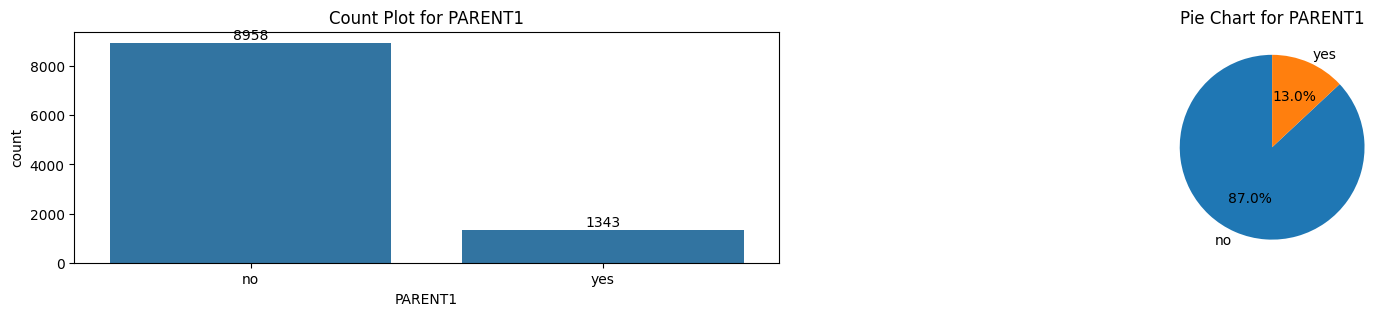

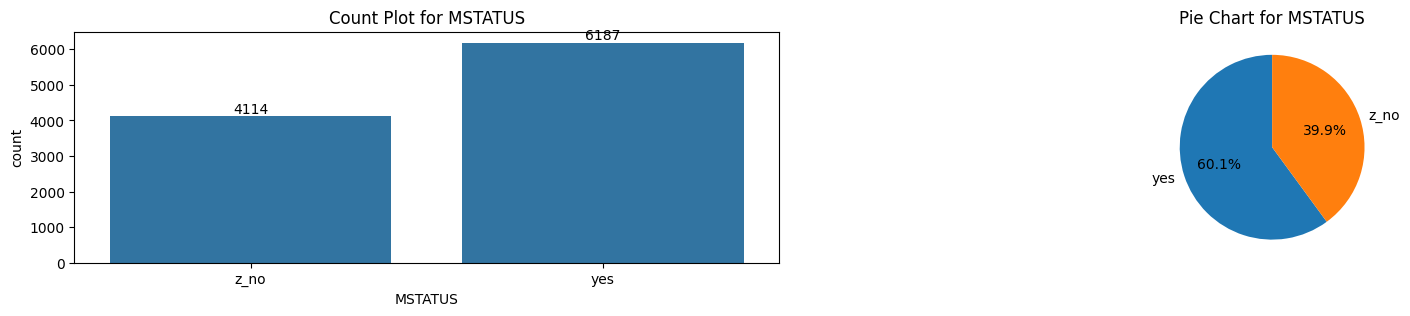

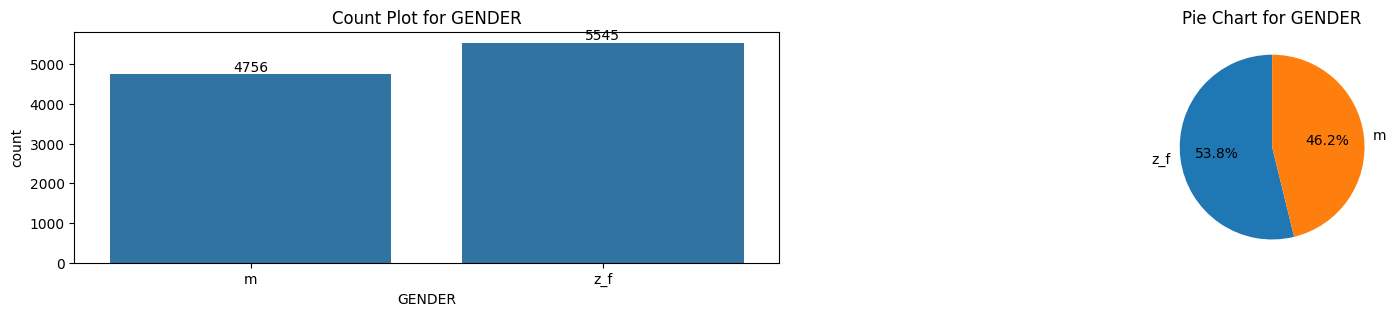

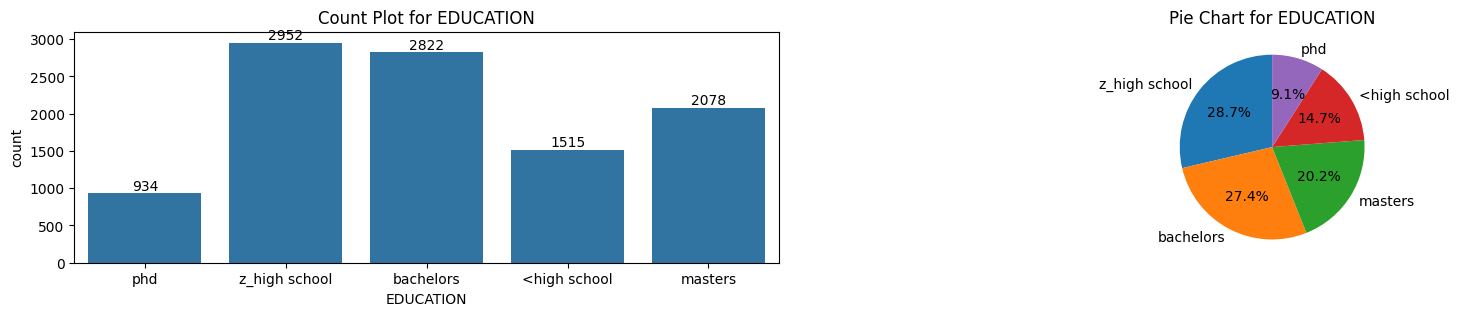

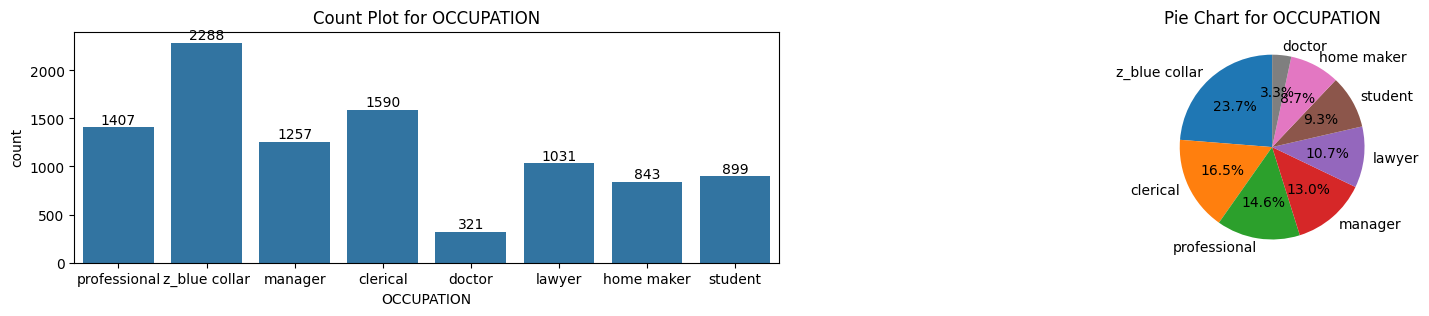

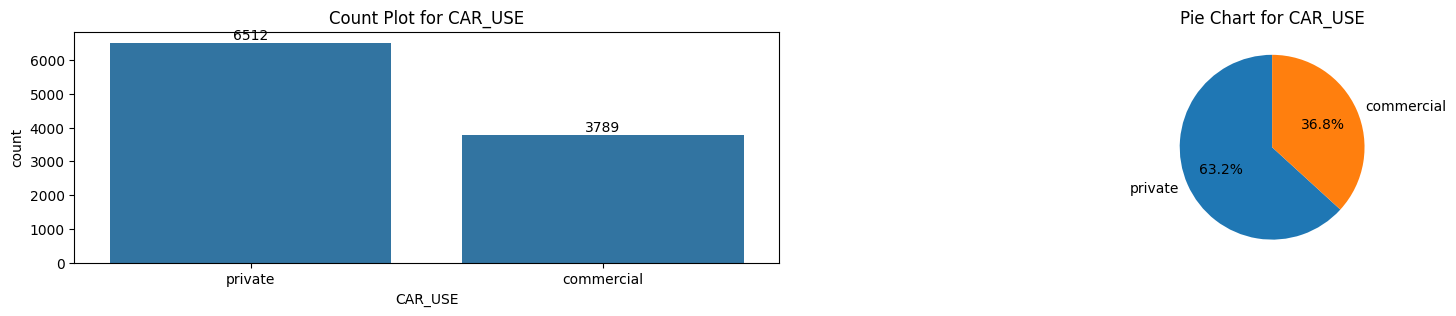

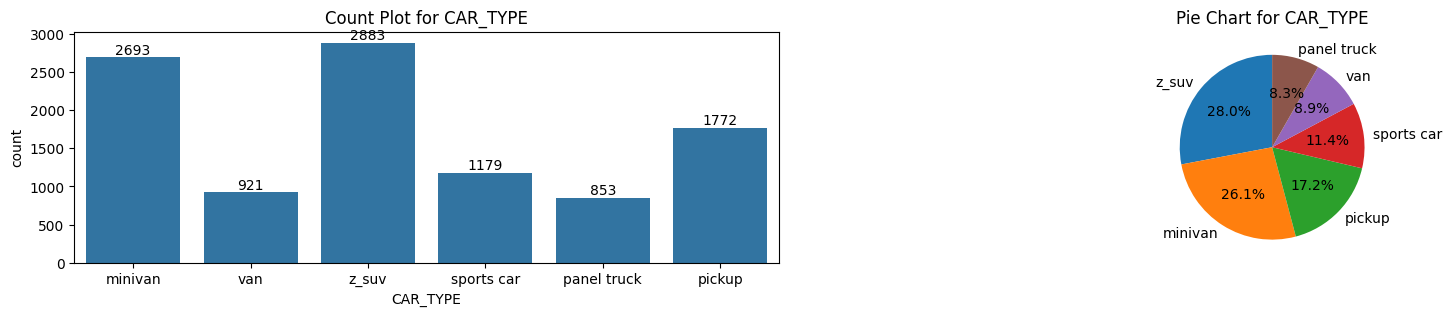

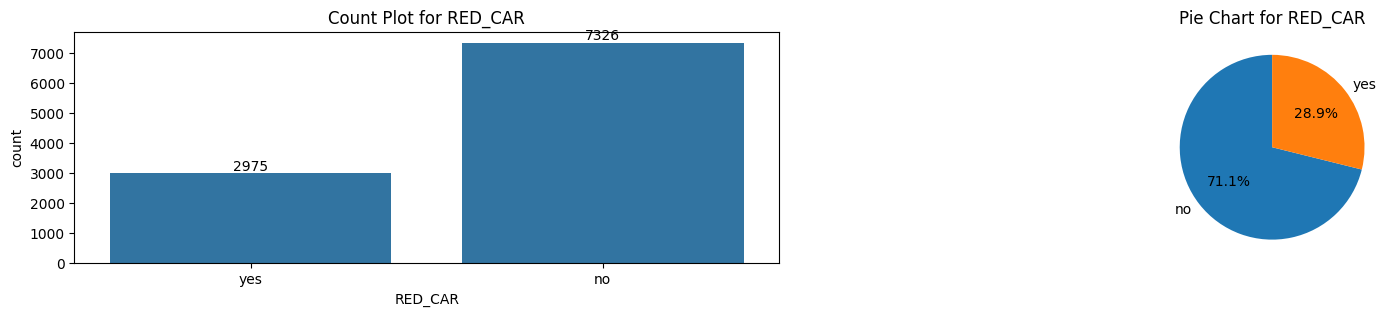

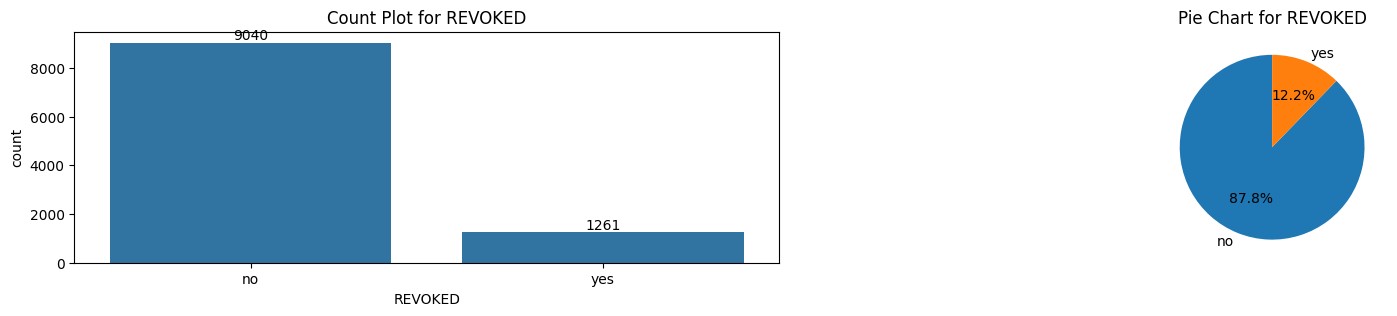

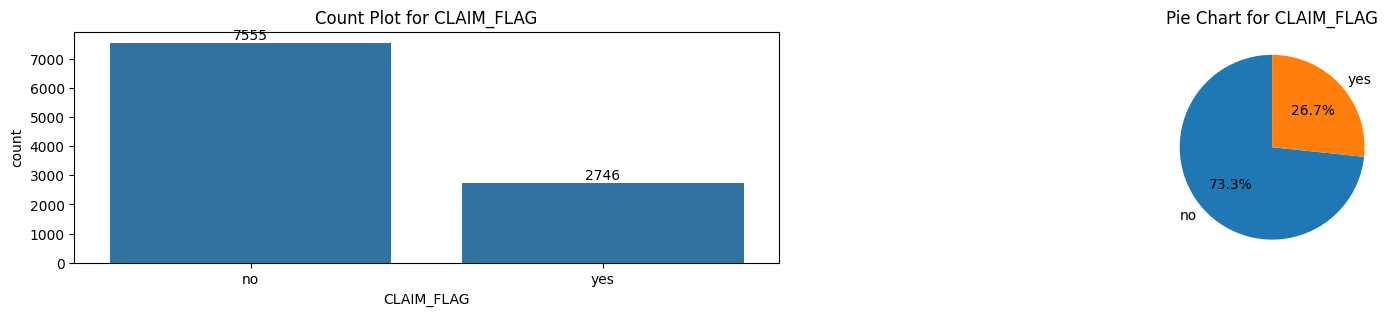

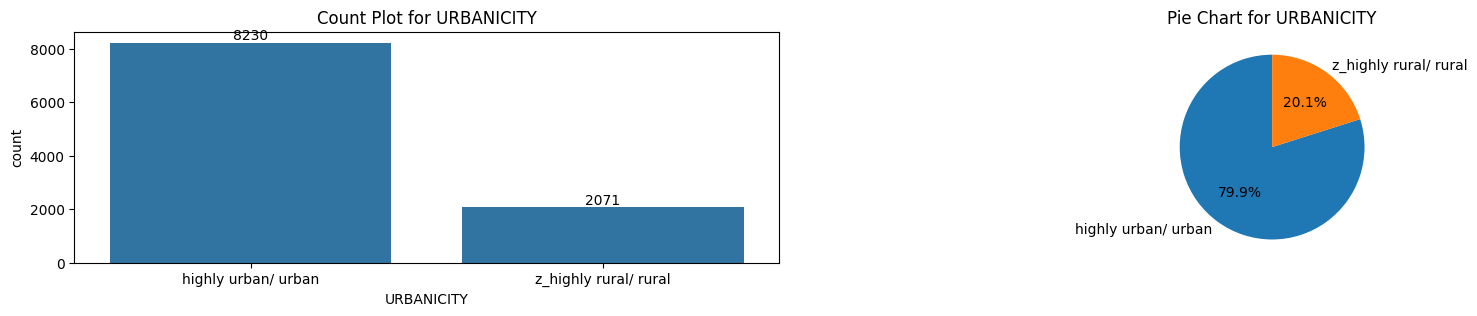

In [ ]:
def graphs(d, var):
    plt.figure(figsize=(20, 3)) # Set figure size
    plt.subplot(1, 2, 1) # Create the first plot
    a = sns.countplot(x=d[var], data=d) # Create a count plot for the categorical variable
    for i in a.containers:
        a.bar_label(i) # Add labels to the bars
    plt.title(f"Count Plot for {var}")   # Set the title for the count plot
    plt.subplot(1, 2, 2)  # Create the second plot (Pie Chart)
    d[var].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)  # Create a pie chart
    plt.title(f"Pie Chart for {var}") # Set the title for the pie chart
    plt.ylabel('')  # Remove the y-axis label
    plt.show() # Display the plots
# Loop through each categorical column and create the plots
for i in Cat_columns.columns:
    graphs(data, i) # Call the graph function for each categorical column

**Insights**
* Parent Status: 87.0% of users are not parents, while 13.0% are parents.

* Marital Status: 60.1% of users are married, while 39.9% are single.

* Gender Distribution: 53.8% of users are female, and 46.2% are male.

* Education Level: The most common education level is Bachelors, with 28.7% of users, followed by High School at 27.4% and Masters at 20.2%.

* Occupation: Blue Collar workers represent 23.7% of the dataset, with Professional at 16.5%, and Clerical at 14.6%.

* Car Use: 63.2% of users use their cars for private purposes, while 36.8% use them for commercial purposes.

* Car Type: SUVs are the most common car type with 28.0%, followed by Minivans at 26.1%, and Pickup at 17.2%.

* Red Car: 71.1% of users do not own a red car, while 28.9% own a red car.

* Revoked Status: 87.8% of users have not had their status revoked, while 12.2% have.

* Urbanicity: 79.9% of users live in urban areas, while 20.1% reside in rural areas.
















In [ ]:
data.describe()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CLM_AMT,CAR_AGE
count,1.030100e+04,10301.000000,10301.000000,10294.000000,10301.000000,9753.000000,9731.000000,9726.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,9662.000000
mean,4.956841e+08,0.169304,1954.091253,44.837964,0.720513,10.473700,61568.835680,154513.740284,33.416853,15660.015532,5.329580,4034.369479,0.800796,1.710319,1511.413164,8.299524
std,2.864735e+08,0.506533,8.697328,8.606671,1.116355,4.108999,47458.566563,129191.840215,15.870398,8429.169220,4.110773,8733.476588,1.154108,2.159054,4725.455807,5.713361
min,6.317500e+04,0.000000,1925.000000,16.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.442710e+08,0.000000,1948.000000,39.000000,0.000000,9.000000,27583.000000,0.000000,22.000000,9200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4.970541e+08,0.000000,1954.000000,45.000000,0.000000,11.000000,53526.000000,160629.000000,33.000000,14400.000000,4.000000,0.000000,0.000000,1.000000,0.000000,8.000000
75%,7.395301e+08,0.000000,1960.000000,51.000000,1.000000,13.000000,86139.500000,238251.250000,44.000000,20890.000000,7.000000,4648.000000,2.000000,3.000000,1145.000000,12.000000
max,9.999264e+08,4.000000,2023.000000,81.000000,5.000000,23.000000,367030.000000,885282.000000,142.000000,69740.000000,25.000000,57037.000000,5.000000,13.000000,123247.000000,28.000000


Bi *variate*
* Categorical to Categorical


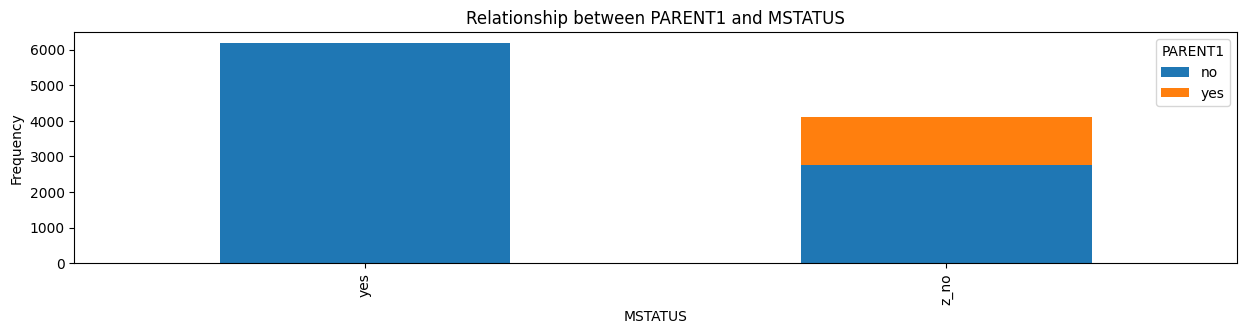

Cross-tabulation for MSTATUS:
PARENT1    no   yes
MSTATUS            
yes      6187     0
z_no     2771  1343



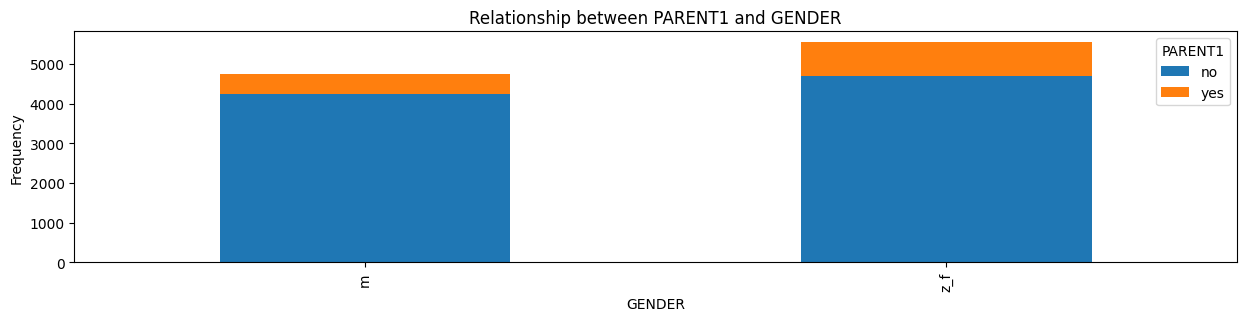

Cross-tabulation for GENDER:
PARENT1    no  yes
GENDER            
m        4255  501
z_f      4703  842



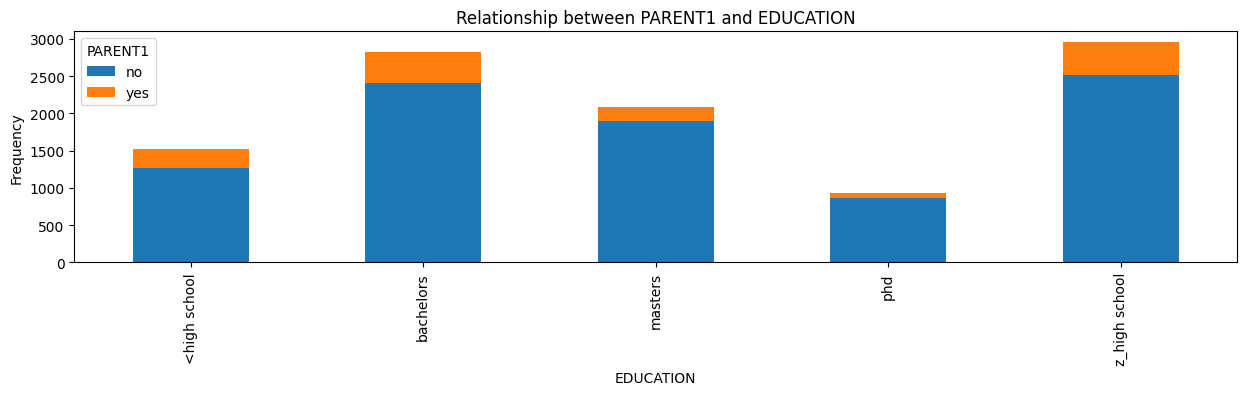

Cross-tabulation for EDUCATION:
PARENT1          no  yes
EDUCATION               
<high school   1270  245
bachelors      2412  410
masters        1902  176
phd             861   73
z_high school  2513  439



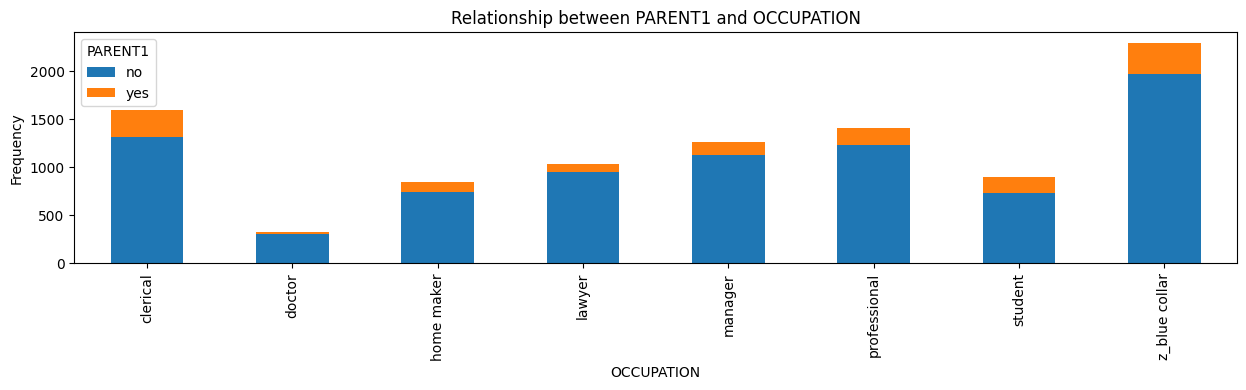

Cross-tabulation for OCCUPATION:
PARENT1          no  yes
OCCUPATION              
clerical       1315  275
doctor          303   18
home maker      739  104
lawyer          943   88
manager        1124  133
professional   1232  175
student         734  165
z_blue collar  1964  324



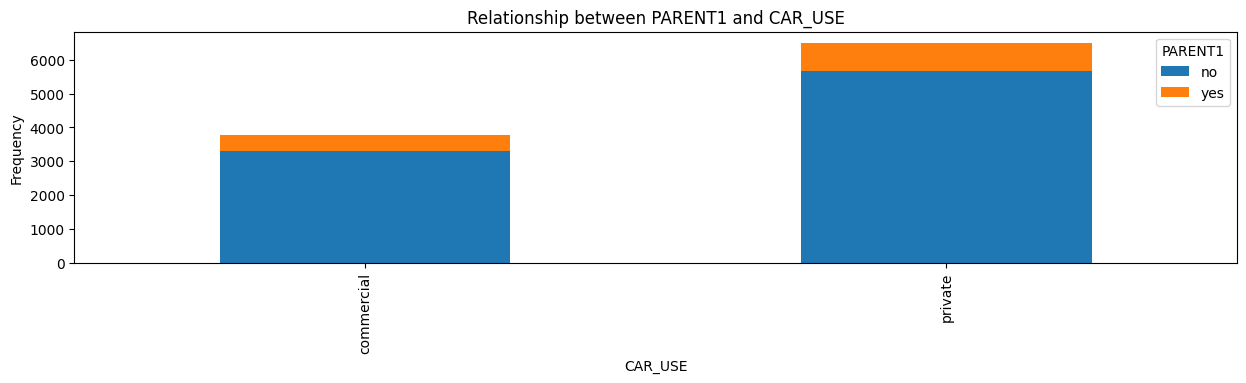

Cross-tabulation for CAR_USE:
PARENT1       no  yes
CAR_USE              
commercial  3291  498
private     5667  845



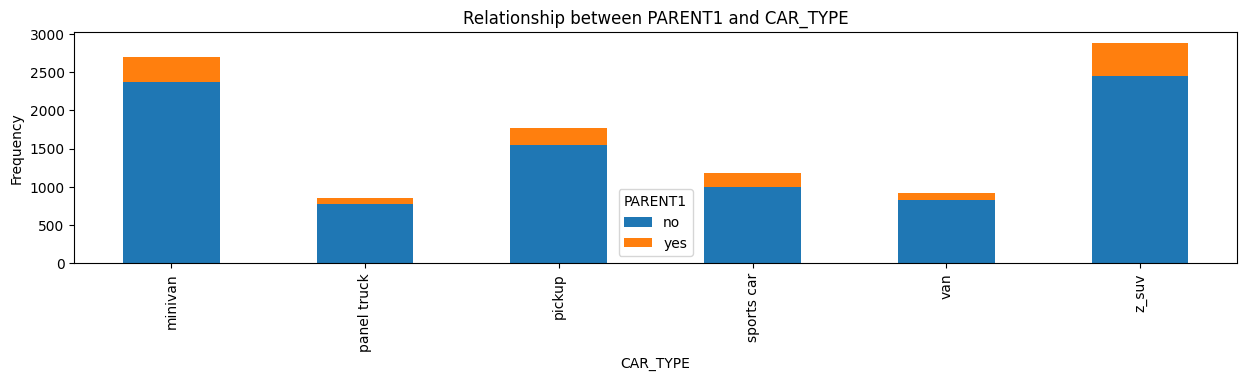

Cross-tabulation for CAR_TYPE:
PARENT1        no  yes
CAR_TYPE              
minivan      2367  326
panel truck   773   80
pickup       1545  227
sports car    999  180
van           828   93
z_suv        2446  437



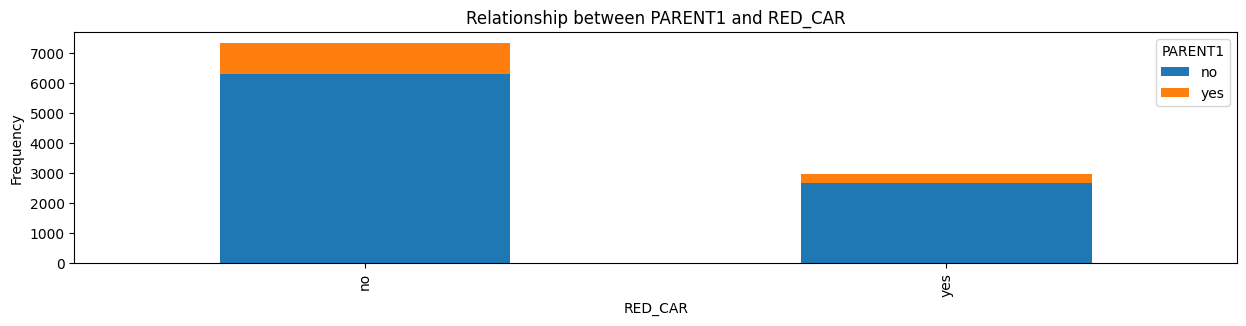

Cross-tabulation for RED_CAR:
PARENT1    no   yes
RED_CAR            
no       6301  1025
yes      2657   318



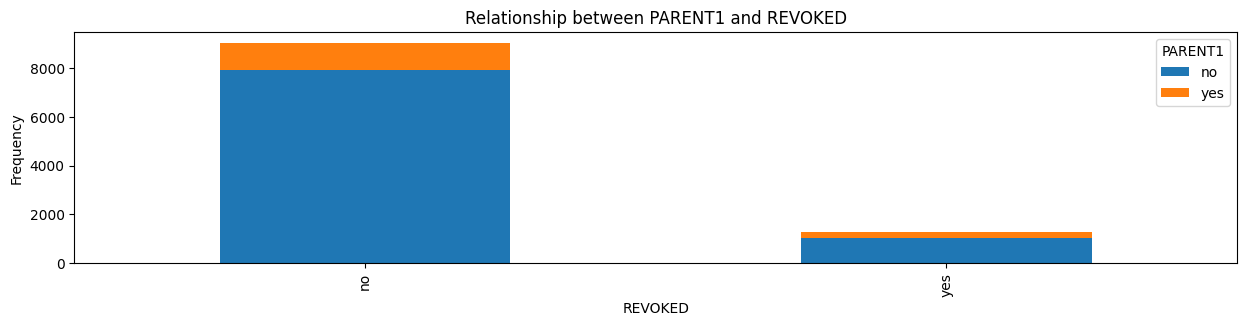

Cross-tabulation for REVOKED:
PARENT1    no   yes
REVOKED            
no       7919  1121
yes      1039   222



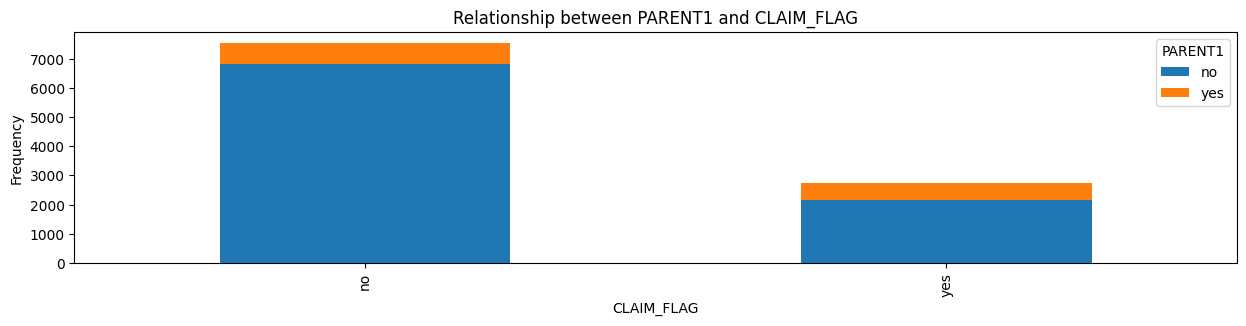

Cross-tabulation for CLAIM_FLAG:
PARENT1       no  yes
CLAIM_FLAG           
no          6813  742
yes         2145  601



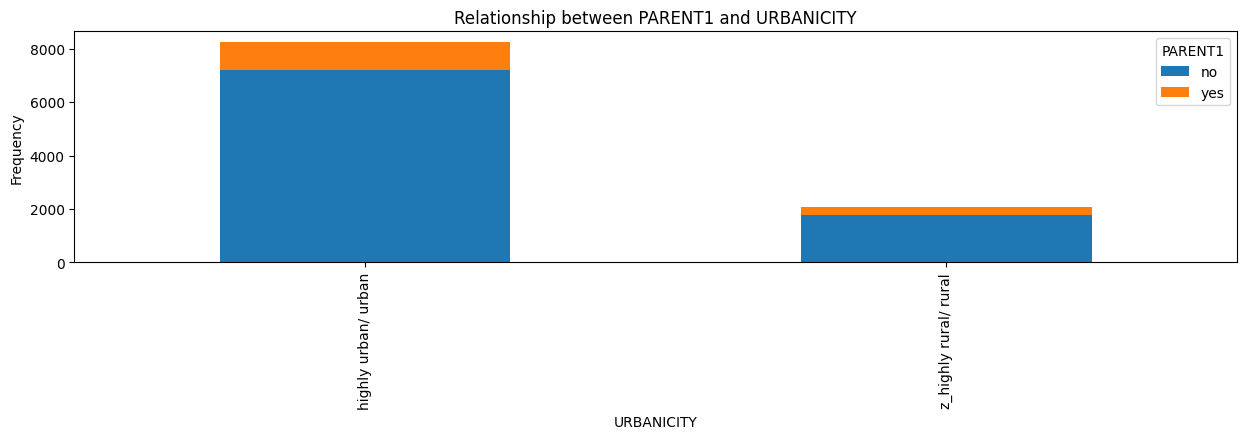

Cross-tabulation for URBANICITY:
PARENT1                  no   yes
URBANICITY                       
highly urban/ urban    7188  1042
z_highly rural/ rural  1770   301



In [ ]:
# Set the target column to 'Claim Status' if it exists in the dataset; otherwise, using the first column.
target_column = 'Claim Status' if 'Claim Status' in Cat_columns.columns else Cat_columns.columns[0]
# Check if the target column is in the dataset.
if target_column in Cat_columns.columns:
   # Loop through each column in the dataset, skipping the target column.
    for i in Cat_columns.columns:
        if i != target_column:
           # Ensure the target column is not compared to itself
            cat_cat_relation = pd.crosstab(data[i], data[target_column])# Create a table showing the frequency of each combination of the current column and the target column.
            cat_cat_relation.plot(kind='bar', stacked=True, figsize=(15, 3)) # Create a stacked bar chart to visualize how the current column relates to the target column.
            plt.title(f"Relationship between {target_column} and {i}")# Add a title to describe the chart.
            plt.xlabel(i) # Label the x-axis to indicate the current column being analyzed.
            plt.ylabel("Frequency")  # Label the y-axis to show the count of occurrences.
            plt.legend(loc=0, title=target_column) # Add a legend to clarify the categories in the target column.
            plt.show()# Display the chart.
            # Print the frequency table to see the exact numbers behind the relationship.
            print(f"Cross-tabulation for {i}:\n{cat_cat_relation}\n")
else:
  # If the target column is not in the dataset, show a message to inform the user.
    print(f"The target column '{target_column}' is not found in the dataset.")


* Marital Status: Most parents are married, while non-parents are often not married.

* Gender: Women are more likely to be parents compared to men.

* Education: Parenthood is most common among those with a bachelor's degree.

* Occupation: Parents are mostly in clerical or professional jobs, while students and doctors are less likely to be parents.

* Car Use: Parents prefer private cars, while non-parents are more likely to use commercial vehicles.

* Car Type: Parents favor SUVs and minivans, likely for family needs.

* Red Cars: Non-parents are more likely to own red cars.

* License Revocation: Rare for both groups, but slightly higher among non-parents.

* Urban vs. Rural: Parents are more concentrated in urban areas, with fewer in rural regions.


Catgorical to Numerical

### Numerical-to-numerical
* data looks at how two numbers are related, like age and income or travel time and claim amount. It shows patterns or trends, often using scatter plots or correlation to understand the connection.

We are taking correlation

* Correlation means finding the relation between two numerical columns

    * -1 -> Perfect Negative
    * -0.9 -> Strong Negative
    * -0.5 -> Weak Negative
    *  0  -> No Correlation
    * 0.5 -> Weak Positive
    * 0.9 -> Strong Positive
    *  1  -> Perfect Positive

In [ ]:
Num_columns.corr()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CLM_AMT,CAR_AGE
ID,1.000000,0.003484,0.010685,-0.010474,0.009097,-0.011002,-0.021532,-0.014317,-0.002430,-0.000221,-0.010274,0.002581,-0.001487,0.008334,-0.012781,-0.004804
KIDSDRIV,0.003484,1.000000,0.075234,-0.078451,0.463644,0.043002,-0.043196,-0.015424,0.012198,-0.028512,-0.005865,0.023872,0.038930,0.048400,0.068273,-0.059724
BIRTH,0.010685,0.075234,1.000000,-0.979721,0.446221,-0.134122,-0.184705,-0.206779,0.003236,-0.164842,0.005910,0.033367,0.038044,0.077819,0.048907,-0.176941
AGE,-0.010474,-0.078451,-0.979721,1.000000,-0.447848,0.140946,0.186257,0.209658,-0.001587,0.166286,-0.001960,-0.033409,-0.037688,-0.075788,-0.049056,0.178578
HOMEKIDS,0.009097,0.463644,0.446221,-0.447848,1.000000,0.077768,-0.160193,-0.107442,-0.000739,-0.108579,0.007444,0.029728,0.038619,0.064248,0.068628,-0.159205
YOJ,-0.011002,0.043002,-0.134122,0.140946,0.077768,1.000000,0.293856,0.272151,-0.017128,0.148101,0.024016,-0.005036,-0.023476,-0.041526,-0.026771,0.064865
INCOME,-0.021532,-0.043196,-0.184705,0.186257,-0.160193,0.293856,1.000000,0.578922,-0.051835,0.429113,0.002433,-0.039316,-0.049175,-0.063445,-0.057665,0.417481
HOME_VAL,-0.014317,-0.015424,-0.206779,0.209658,-0.107442,0.272151,0.578922,1.000000,-0.035120,0.261977,0.006844,-0.059772,-0.093809,-0.092409,-0.091967,0.223410
TRAVTIME,-0.002430,0.012198,0.003236,-0.001587,-0.000739,-0.017128,-0.051835,-0.035120,1.000000,-0.022539,-0.013357,-0.013819,0.008255,0.009673,0.031262,-0.033249
BLUEBOOK,-0.000221,-0.028512,-0.164842,0.166286,-0.108579,0.148101,0.429113,0.261977,-0.022539,1.000000,0.000693,-0.030731,-0.042138,-0.044828,-0.002446,0.194395


<Axes: >

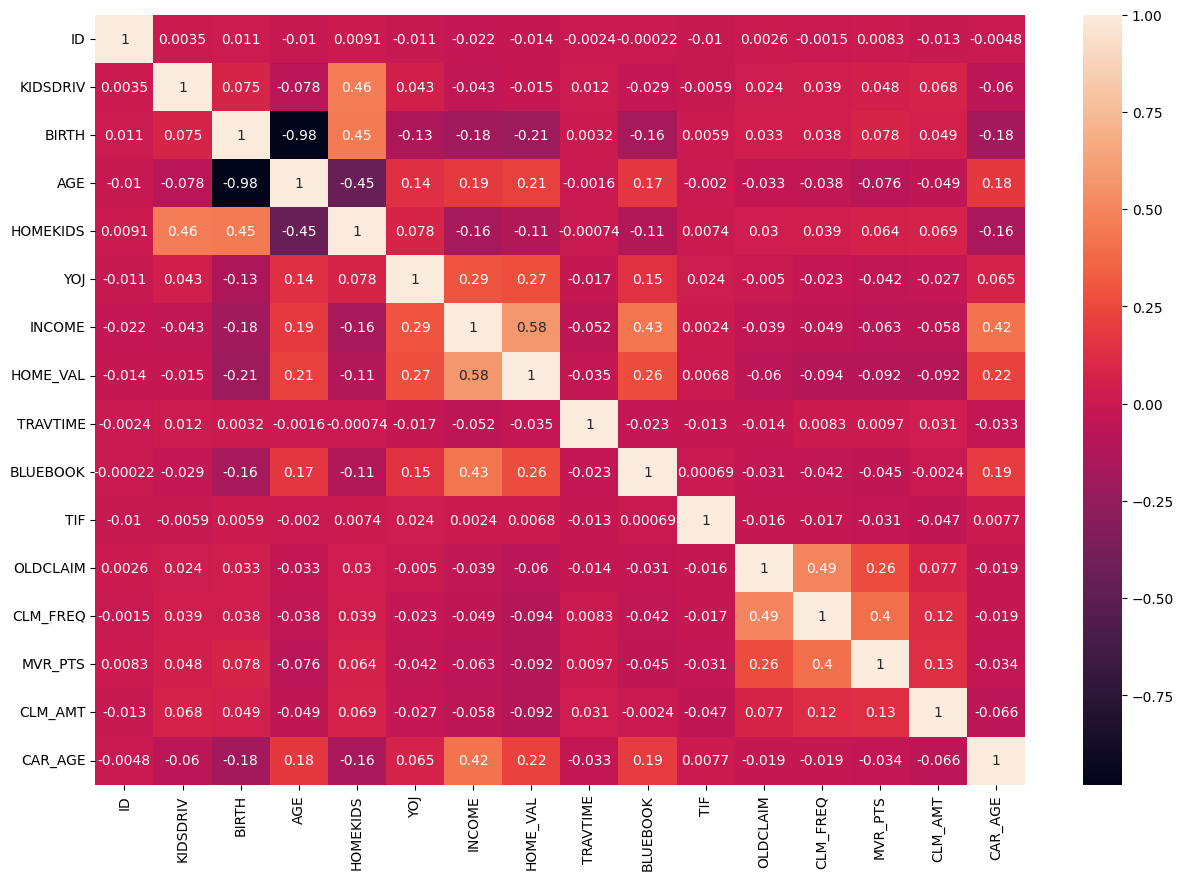

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(Num_columns.corr(),annot=True)

### Missing Values & Outlier Handling

Missing Values

In [ ]:
data.head()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,1939,60.0,0,11.0,67349.0,no,0.0,z_no,...,minivan,yes,4461,2,no,3,0,18.0,no,highly urban/ urban
1,132761049,0,1956,43.0,0,11.0,91449.0,no,257252.0,z_no,...,minivan,yes,0,0,no,0,0,1.0,no,highly urban/ urban
2,921317019,0,1951,48.0,0,11.0,52881.0,no,0.0,z_no,...,van,yes,0,0,no,2,0,10.0,no,highly urban/ urban
3,727598473,0,1964,35.0,1,10.0,16039.0,no,124191.0,yes,...,z_suv,no,38690,2,no,3,0,10.0,no,highly urban/ urban
4,450221861,0,1948,51.0,0,14.0,NaN,no,306251.0,yes,...,minivan,yes,0,0,no,0,0,6.0,no,highly urban/ urban


In [ ]:
data.isnull().sum() # Checking missing values count for each column


,0
ID,0
KIDSDRIV,0
BIRTH,0
AGE,7
HOMEKIDS,0
YOJ,548
INCOME,570
PARENT1,0
HOME_VAL,575
MSTATUS,0


* We handle the null values by using median for numerical data and mode for categorical data





In [ ]:
def random_sample(data,var):
  if var in data.select_dtypes(exclude='object'):
    data[var] = data[var].fillna(data[var].median())
  else:
    data[var] = data[var].fillna(data[var].mode())

col = ['AGE','YOJ','INCOME','HOME_VAL','OCCUPATION','CAR_AGE']
for i in col:
  random_sample(data,i)
data.head()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,1939,60.0,0,11.0,67349.0,no,0.0,z_no,...,minivan,yes,4461,2,no,3,0,18.0,no,highly urban/ urban
1,132761049,0,1956,43.0,0,11.0,91449.0,no,257252.0,z_no,...,minivan,yes,0,0,no,0,0,1.0,no,highly urban/ urban
2,921317019,0,1951,48.0,0,11.0,52881.0,no,0.0,z_no,...,van,yes,0,0,no,2,0,10.0,no,highly urban/ urban
3,727598473,0,1964,35.0,1,10.0,16039.0,no,124191.0,yes,...,z_suv,no,38690,2,no,3,0,10.0,no,highly urban/ urban
4,450221861,0,1948,51.0,0,14.0,53526.0,no,306251.0,yes,...,minivan,yes,0,0,no,0,0,6.0,no,highly urban/ urban


# Outliers

* Outliers are the odd ones out in a dataset—values that look very different from the rest, either much bigger or smaller, and can sometimes indicate mistakes or something unique happening.

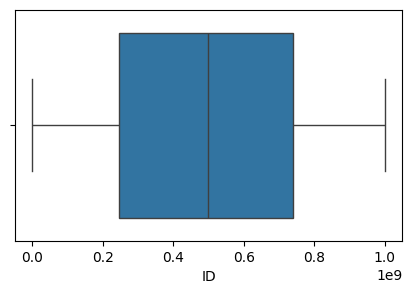

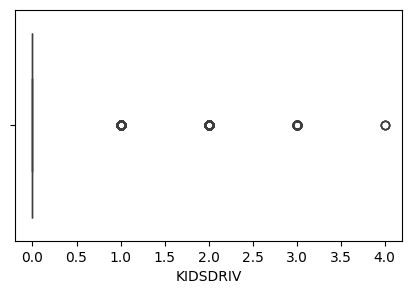

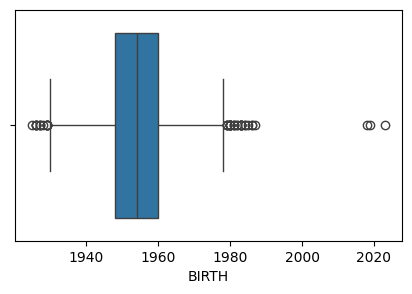

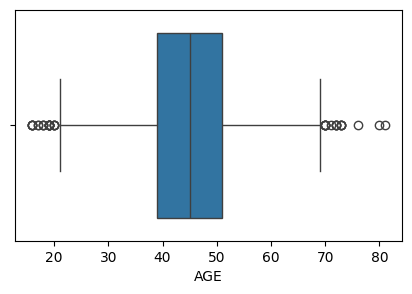

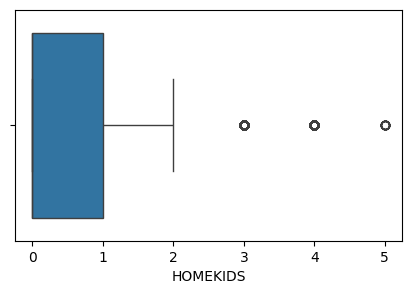

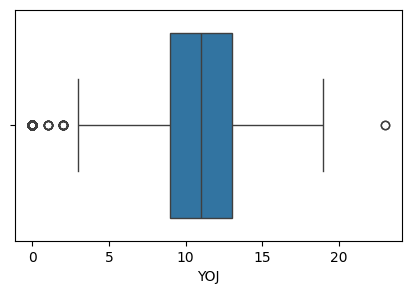

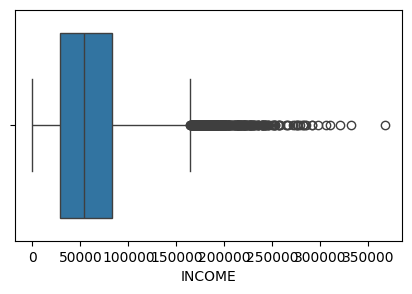

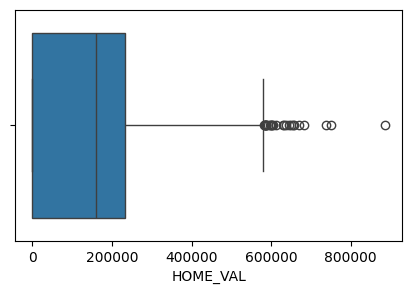

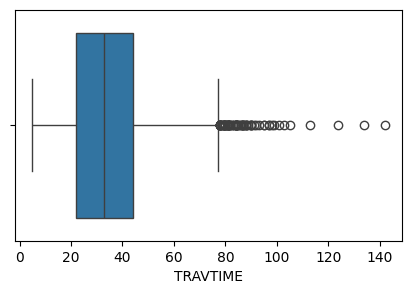

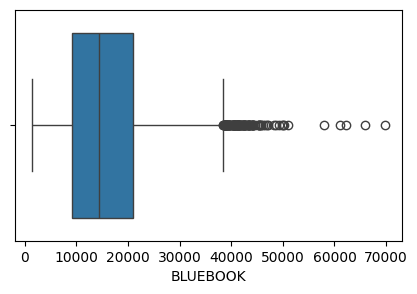

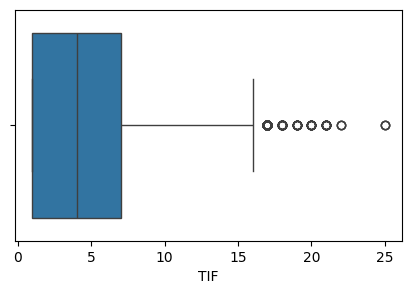

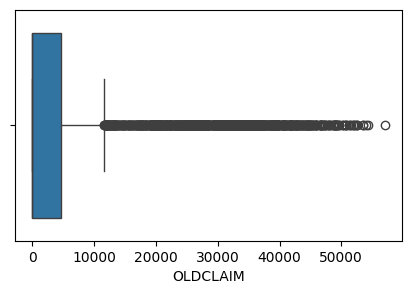

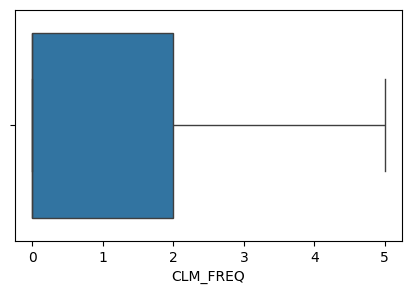

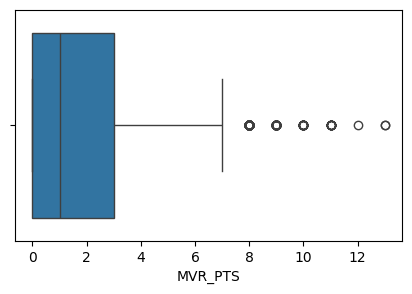

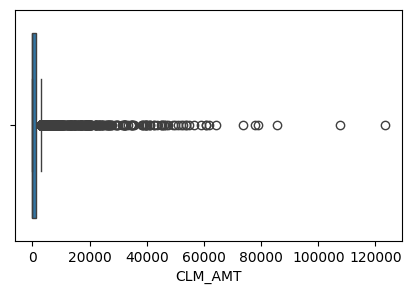

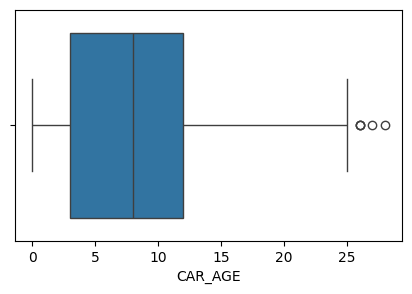

In [ ]:
def han_out(data,var):
  plt.figure(figsize=(5,3))
  sns.boxplot(x = data[var])
  plt.show()
for j in data.select_dtypes(exclude='object'):
  han_out(data,j)

We get outliers in KIDSDRIV, BIRTH, AGE, HOMEKIDS, YOJ, INCOME, HOME_VAL,TRAVTIME, BLUEBOOK, TIF, OLDCLAIM, CLM_FREQ, MVR_PTS, CLM_AMT columns


### IQR method
* This code identifies and handles outliers in numeric columns using the IQR method. It replaces extreme values with the calculated upper or lower bounds


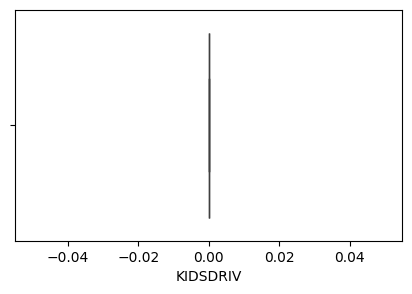

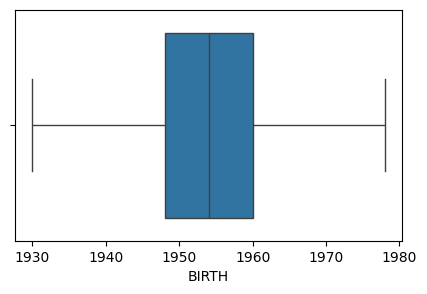

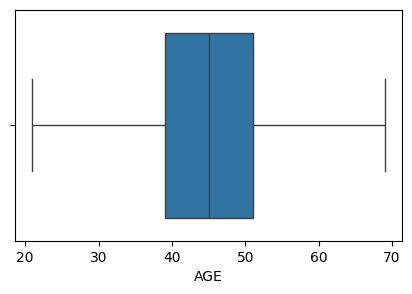

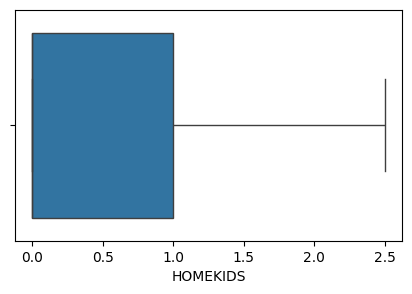

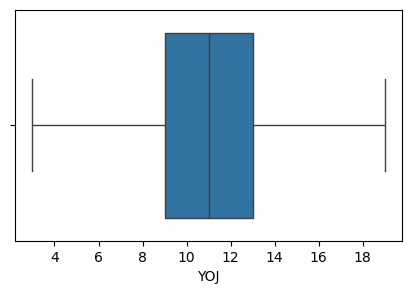

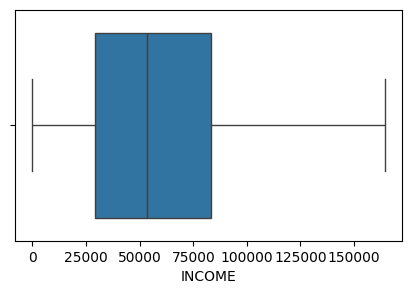

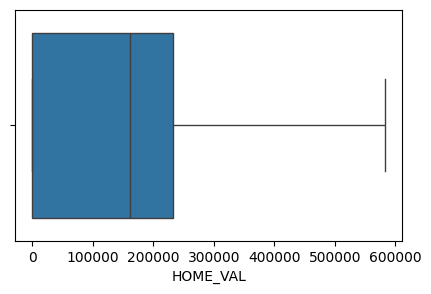

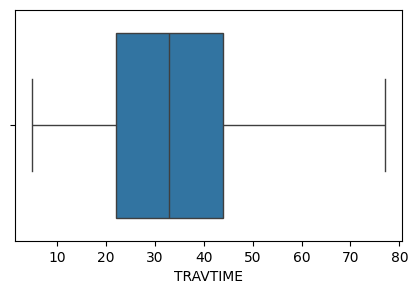

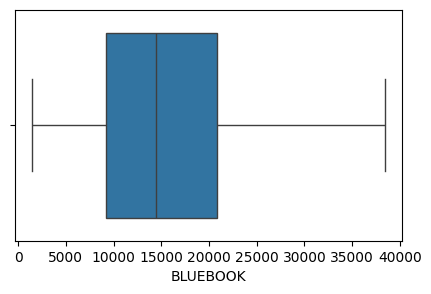

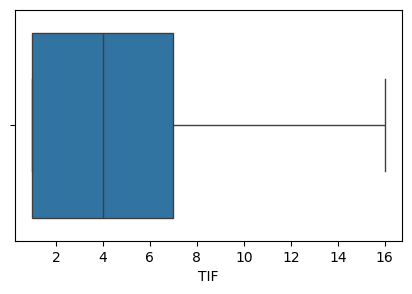

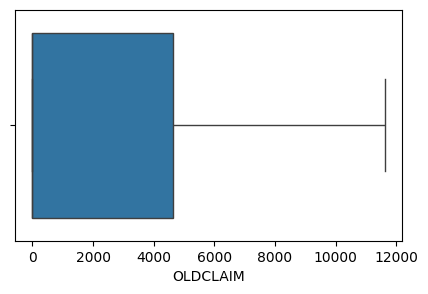

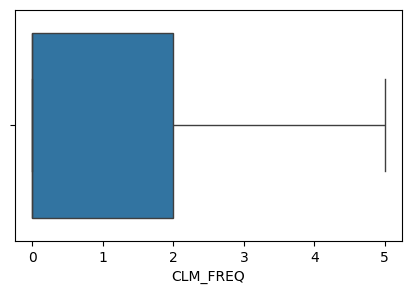

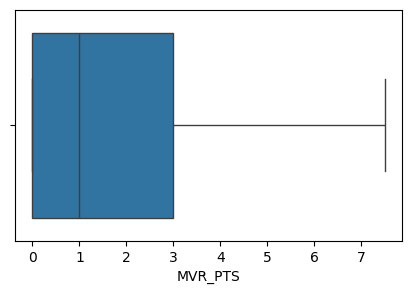

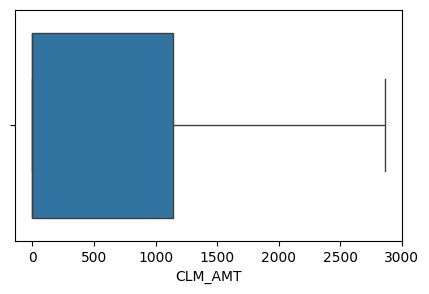

In [ ]:
def fun(data,var):
  iqr = data[var].quantile(0.75) - data[var].quantile(0.25)
  upper = data[var].quantile(0.75) + (1.5 * iqr)
  lower = data[var].quantile(0.25) - (1.5 * iqr)
  return upper,lower
cols = ['KIDSDRIV','BIRTH','AGE','HOMEKIDS','YOJ','INCOME','HOME_VAL','TRAVTIME','BLUEBOOK','TIF','OLDCLAIM',
        'CLM_FREQ','MVR_PTS','CLM_AMT']
for p in cols:
  upper_value,lower_value = fun(data,p)
  data[p] = np.where(data[p] > upper_value,upper_value,
            np.where(data[p] < lower_value,lower_value,data[p]))
  han_out(data,p)

In [ ]:
# Standardizing CLAIM_FLAG column by mapping float values (0.0, 1.0) to integers (0, 1)
#data['CLAIM_FLAG'] = data['CLAIM_FLAG'].map({0.0:0,1.0:1})


In [ ]:
data.drop(['ID','PARENT1','RED_CAR','TRAVTIME'],axis=1)

,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,TIF,CAR_TYPE,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,0.0,1939.0,60.0,0.0,11.0,67349.0,0.0,z_no,m,phd,...,11.0,minivan,4461.0,2.0,no,3.0,0.0,18.0,no,highly urban/ urban
1,0.0,1956.0,43.0,0.0,11.0,91449.0,257252.0,z_no,m,z_high school,...,1.0,minivan,0.0,0.0,no,0.0,0.0,1.0,no,highly urban/ urban
2,0.0,1951.0,48.0,0.0,11.0,52881.0,0.0,z_no,m,bachelors,...,1.0,van,0.0,0.0,no,2.0,0.0,10.0,no,highly urban/ urban
3,0.0,1964.0,35.0,1.0,10.0,16039.0,124191.0,yes,z_f,z_high school,...,4.0,z_suv,11620.0,2.0,no,3.0,0.0,10.0,no,highly urban/ urban
4,0.0,1948.0,51.0,0.0,14.0,53526.0,306251.0,yes,m,<high school,...,7.0,minivan,0.0,0.0,no,0.0,0.0,6.0,no,highly urban/ urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10296,0.0,1954.0,45.0,2.0,9.0,164313.5,386273.0,yes,m,phd,...,15.0,minivan,0.0,0.0,no,2.0,0.0,17.0,no,highly urban/ urban
10297,0.0,1953.0,46.0,0.0,9.0,107204.0,332591.0,yes,m,masters,...,6.0,panel truck,0.0,0.0,no,0.0,0.0,1.0,no,highly urban/ urban
10298,0.0,1951.0,48.0,0.0,15.0,39837.0,170611.0,yes,z_f,<high school,...,7.0,z_suv,0.0,0.0,no,0.0,0.0,1.0,no,highly urban/ urban
10299,0.0,1948.0,50.0,0.0,7.0,43445.0,149248.0,yes,z_f,bachelors,...,6.0,minivan,0.0,0.0,no,0.0,0.0,11.0,no,highly urban/ urban


In [ ]:
data = data[['KIDSDRIV', 'BIRTH', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION',
             'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE','OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS','CLM_AMT','CAR_AGE','URBANICITY','CLAIM_FLAG']]

In [ ]:
data.to_csv("modified_insurance data.csv",index=False)

**PREDICTIVE MODELING**

* Building a predictive model/trained algorithm to get the relation betweeen one col(y) to other columns (X)

    y ~ f(x)+e

####  Selecting X & y <a id=xy>
    


* Selecting Output column (y) - future prediction column & Input column/columns (X) - Reference columns

    -  X (independent variables/input columns/explanatory variables)
    - y (dependent variable/output column/response column

In [ ]:
data.head()

,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,TIF,CAR_TYPE,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,URBANICITY,CLAIM_FLAG
0,0.0,1939.0,60.0,0.0,11.0,67349.0,0.0,z_no,m,phd,...,11.0,minivan,4461.0,2.0,no,3.0,0.0,18.0,highly urban/ urban,no
1,0.0,1956.0,43.0,0.0,11.0,91449.0,257252.0,z_no,m,z_high school,...,1.0,minivan,0.0,0.0,no,0.0,0.0,1.0,highly urban/ urban,no
2,0.0,1951.0,48.0,0.0,11.0,52881.0,0.0,z_no,m,bachelors,...,1.0,van,0.0,0.0,no,2.0,0.0,10.0,highly urban/ urban,no
3,0.0,1964.0,35.0,1.0,10.0,16039.0,124191.0,yes,z_f,z_high school,...,4.0,z_suv,11620.0,2.0,no,3.0,0.0,10.0,highly urban/ urban,no
4,0.0,1948.0,51.0,0.0,14.0,53526.0,306251.0,yes,m,<high school,...,7.0,minivan,0.0,0.0,no,0.0,0.0,6.0,highly urban/ urban,no


* For this we dataset we want to predict Claim_Flag, taking **Claim_Flag column as Output (y)**
    - **Remaining Columns data can be taken as input (X)**

In [ ]:
X = data.drop('CLAIM_FLAG',axis=1)
y = data['CLAIM_FLAG']

In [ ]:
X.head()

,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,BLUEBOOK,TIF,CAR_TYPE,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,URBANICITY
0,0.0,1939.0,60.0,0.0,11.0,67349.0,0.0,z_no,m,phd,...,14230.0,11.0,minivan,4461.0,2.0,no,3.0,0.0,18.0,highly urban/ urban
1,0.0,1956.0,43.0,0.0,11.0,91449.0,257252.0,z_no,m,z_high school,...,14940.0,1.0,minivan,0.0,0.0,no,0.0,0.0,1.0,highly urban/ urban
2,0.0,1951.0,48.0,0.0,11.0,52881.0,0.0,z_no,m,bachelors,...,21970.0,1.0,van,0.0,0.0,no,2.0,0.0,10.0,highly urban/ urban
3,0.0,1964.0,35.0,1.0,10.0,16039.0,124191.0,yes,z_f,z_high school,...,4010.0,4.0,z_suv,11620.0,2.0,no,3.0,0.0,10.0,highly urban/ urban
4,0.0,1948.0,51.0,0.0,14.0,53526.0,306251.0,yes,m,<high school,...,15440.0,7.0,minivan,0.0,0.0,no,0.0,0.0,6.0,highly urban/ urban


In [ ]:
y.head()

,CLAIM_FLAG
0,no
1,no
2,no
3,no
4,no


### Feature Engineering of X

* Generation/ Modification / Deletion / Selection of X columns/features according to y column

In [ ]:
X.head()

,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,BLUEBOOK,TIF,CAR_TYPE,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,URBANICITY
0,0.0,1939.0,60.0,0.0,11.0,67349.0,0.0,z_no,m,phd,...,14230.0,11.0,minivan,4461.0,2.0,no,3.0,0.0,18.0,highly urban/ urban
1,0.0,1956.0,43.0,0.0,11.0,91449.0,257252.0,z_no,m,z_high school,...,14940.0,1.0,minivan,0.0,0.0,no,0.0,0.0,1.0,highly urban/ urban
2,0.0,1951.0,48.0,0.0,11.0,52881.0,0.0,z_no,m,bachelors,...,21970.0,1.0,van,0.0,0.0,no,2.0,0.0,10.0,highly urban/ urban
3,0.0,1964.0,35.0,1.0,10.0,16039.0,124191.0,yes,z_f,z_high school,...,4010.0,4.0,z_suv,11620.0,2.0,no,3.0,0.0,10.0,highly urban/ urban
4,0.0,1948.0,51.0,0.0,14.0,53526.0,306251.0,yes,m,<high school,...,15440.0,7.0,minivan,0.0,0.0,no,0.0,0.0,6.0,highly urban/ urban


###Feature Selection or Deletion

In [ ]:
X.head(2)


,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,BLUEBOOK,TIF,CAR_TYPE,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,URBANICITY
0,0.0,1939.0,60.0,0.0,11.0,67349.0,0.0,z_no,m,phd,...,14230.0,11.0,minivan,4461.0,2.0,no,3.0,0.0,18.0,highly urban/ urban
1,0.0,1956.0,43.0,0.0,11.0,91449.0,257252.0,z_no,m,z_high school,...,14940.0,1.0,minivan,0.0,0.0,no,0.0,0.0,1.0,highly urban/ urban


In [ ]:
X.to_csv('InsInpData.csv',index=False)

* From the Business Understanding We can drop ID,TRAVTIME,PARENT1 and RED_CAR

### Feature Modification

**Encoding**

* Converting categorical data to numeric

In [ ]:
# Selecting Categorical Data

X.select_dtypes("O").head()

,MSTATUS,GENDER,EDUCATION,OCCUPATION,CAR_USE,CAR_TYPE,REVOKED,URBANICITY
0,z_no,m,phd,professional,private,minivan,no,highly urban/ urban
1,z_no,m,z_high school,z_blue collar,commercial,minivan,no,highly urban/ urban
2,z_no,m,bachelors,manager,private,van,no,highly urban/ urban
3,yes,z_f,z_high school,clerical,private,z_suv,no,highly urban/ urban
4,yes,m,<high school,z_blue collar,private,minivan,no,highly urban/ urban


* From above categorical columns we have

     * Binary columns: PARENT1,MSTATUS,GENDER,CAR_USE,RED_CAR,REVOKED,URBANICITY - Binary Encoding (0,1)

     * Nominal columns: OCCUPATION,CAR_TYPE - One Hot Encoding
     * Ordinal column: EDUCATION - Ordinal Encoding

* **Binary Columns Data Encoding**

In [ ]:
print('MSTATUS:')
print(X.MSTATUS.unique())
print('GENDER:')
print(X.GENDER.unique())
print('CAR_USE:')
print(X.CAR_USE.unique())
print('REVOKED:')
print(X.REVOKED.unique())
print('URBANICITY:')
print(X.URBANICITY.unique())
print('EDUCATION:')
print(X.EDUCATION.unique())
print('OCCUPATION:')
print(X.OCCUPATION.unique())
print('CAR_TYPE')
print(X.CAR_TYPE.unique())

MSTATUS:
['z_no' 'yes']
GENDER:
['m' 'z_f']
CAR_USE:
['private' 'commercial']
REVOKED:
['no' 'yes']
URBANICITY:
['highly urban/ urban' 'z_highly rural/ rural']
EDUCATION:
['phd' 'z_high school' 'bachelors' '<high school' 'masters']
OCCUPATION:
['professional' 'z_blue collar' 'manager' 'clerical' 'doctor' 'lawyer' nan
 'home maker' 'student']
CAR_TYPE
['minivan' 'van' 'z_suv' 'sports car' 'panel truck' 'pickup']


In [ ]:
replacement_mappings = {
    'MSTATUS': {'yes': 1, 'z_no': 0},
    'GENDER': {'m': 1, 'z_f': 0},
    'CAR_USE': {'commercial': 1, 'private': 0},
    'REVOKED': {'yes': 1, 'no': 0},
    'URBANICITY': {'highly urban/ urban': 1, 'z_highly rural/ rural': 0}
}

for column, mapping in replacement_mappings.items():
    if column in X.columns:
        X[column] = X[column].replace(mapping)


X.head()

,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,BLUEBOOK,TIF,CAR_TYPE,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,URBANICITY
0,0.0,1939.0,60.0,0.0,11.0,67349.0,0.0,0,1,phd,...,14230.0,11.0,minivan,4461.0,2.0,0,3.0,0.0,18.0,1
1,0.0,1956.0,43.0,0.0,11.0,91449.0,257252.0,0,1,z_high school,...,14940.0,1.0,minivan,0.0,0.0,0,0.0,0.0,1.0,1
2,0.0,1951.0,48.0,0.0,11.0,52881.0,0.0,0,1,bachelors,...,21970.0,1.0,van,0.0,0.0,0,2.0,0.0,10.0,1
3,0.0,1964.0,35.0,1.0,10.0,16039.0,124191.0,1,0,z_high school,...,4010.0,4.0,z_suv,11620.0,2.0,0,3.0,0.0,10.0,1
4,0.0,1948.0,51.0,0.0,14.0,53526.0,306251.0,1,1,<high school,...,15440.0,7.0,minivan,0.0,0.0,0,0.0,0.0,6.0,1


* **Nominal Column Data Encoding**

In [ ]:
X.select_dtypes("O").head()

,EDUCATION,OCCUPATION,CAR_TYPE
0,phd,professional,minivan
1,z_high school,z_blue collar,minivan
2,bachelors,manager,van
3,z_high school,clerical,z_suv
4,<high school,z_blue collar,minivan


In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
f = one_hot.fit_transform(X[['OCCUPATION','CAR_TYPE']]) # creating one hot columns
v = pd.DataFrame(f)   # converting into dataframe
v.columns = one_hot.get_feature_names_out()
X = pd.concat([X,v],axis=1)  # combining X columns and one hot columns
X = X.drop(['OCCUPATION','CAR_TYPE'],axis=1)  # removing the columns
X.head()

,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,OCCUPATION_professional,OCCUPATION_student,OCCUPATION_z_blue collar,OCCUPATION_nan,CAR_TYPE_minivan,CAR_TYPE_panel truck,CAR_TYPE_pickup,CAR_TYPE_sports car,CAR_TYPE_van,CAR_TYPE_z_suv
0,0.0,1939.0,60.0,0.0,11.0,67349.0,0.0,0,1,phd,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1956.0,43.0,0.0,11.0,91449.0,257252.0,0,1,z_high school,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1951.0,48.0,0.0,11.0,52881.0,0.0,0,1,bachelors,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1964.0,35.0,1.0,10.0,16039.0,124191.0,1,0,z_high school,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1948.0,51.0,0.0,14.0,53526.0,306251.0,1,1,<high school,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


* **Ordinal Column Data Encoding**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
od_en = OrdinalEncoder()
X['EDUCATION'] = od_en.fit_transform(X[['EDUCATION']])
X.head()

,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,OCCUPATION_professional,OCCUPATION_student,OCCUPATION_z_blue collar,OCCUPATION_nan,CAR_TYPE_minivan,CAR_TYPE_panel truck,CAR_TYPE_pickup,CAR_TYPE_sports car,CAR_TYPE_van,CAR_TYPE_z_suv
0,0.0,1939.0,60.0,0.0,11.0,67349.0,0.0,0,1,3.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1956.0,43.0,0.0,11.0,91449.0,257252.0,0,1,4.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1951.0,48.0,0.0,11.0,52881.0,0.0,0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1964.0,35.0,1.0,10.0,16039.0,124191.0,1,0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1948.0,51.0,0.0,14.0,53526.0,306251.0,1,1,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X.shape  # checking the shape after one hot encoding

(10301, 35)

In [ ]:
if isinstance(X, pd.DataFrame):  # Check if X is a Pandas DataFrame
    X.columns = X.columns.astype(str)
    X.columns = X.columns.str.replace(r'[<>[\]]', '', regex=True)

In [ ]:
X.columns

Index(['KIDSDRIV', 'BIRTH', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'HOME_VAL',
       'MSTATUS', 'GENDER', 'EDUCATION', 'CAR_USE', 'BLUEBOOK', 'TIF',
       'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE',
       'URBANICITY', 'OCCUPATION_clerical', 'OCCUPATION_doctor',
       'OCCUPATION_home maker', 'OCCUPATION_lawyer', 'OCCUPATION_manager',
       'OCCUPATION_professional', 'OCCUPATION_student',
       'OCCUPATION_z_blue collar', 'OCCUPATION_nan', 'CAR_TYPE_minivan',
       'CAR_TYPE_panel truck', 'CAR_TYPE_pickup', 'CAR_TYPE_sports car',
       'CAR_TYPE_van', 'CAR_TYPE_z_suv'],
      dtype='object')

In [ ]:
X.head()


,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,OCCUPATION_professional,OCCUPATION_student,OCCUPATION_z_blue collar,OCCUPATION_nan,CAR_TYPE_minivan,CAR_TYPE_panel truck,CAR_TYPE_pickup,CAR_TYPE_sports car,CAR_TYPE_van,CAR_TYPE_z_suv
0,0.0,1939.0,60.0,0.0,11.0,67349.0,0.0,0,1,3.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1956.0,43.0,0.0,11.0,91449.0,257252.0,0,1,4.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1951.0,48.0,0.0,11.0,52881.0,0.0,0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1964.0,35.0,1.0,10.0,16039.0,124191.0,1,0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1948.0,51.0,0.0,14.0,53526.0,306251.0,1,1,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


**SCALING**

* converting numeric columns under one scale

In [ ]:
X.head()

,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,OCCUPATION_professional,OCCUPATION_student,OCCUPATION_z_blue collar,OCCUPATION_nan,CAR_TYPE_minivan,CAR_TYPE_panel truck,CAR_TYPE_pickup,CAR_TYPE_sports car,CAR_TYPE_van,CAR_TYPE_z_suv
0,0.0,1939.0,60.0,0.0,11.0,67349.0,0.0,0,1,3.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1956.0,43.0,0.0,11.0,91449.0,257252.0,0,1,4.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1951.0,48.0,0.0,11.0,52881.0,0.0,0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1964.0,35.0,1.0,10.0,16039.0,124191.0,1,0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1948.0,51.0,0.0,14.0,53526.0,306251.0,1,1,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


* Numeric columns are in different scales, need to apply scaling
    - Taking KIDSDRIV, BIRTH, AGE, HOMEKIDS, YOJ, INCOME, HOME_VAL, BLUEBOOK, TIF, OLDCLAIM, CLM_FREQ, MVR_PTS & CLM_AGE Columns data

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X.iloc[:,[0,1,2,3,4,5,6,12,13,15,16,18,19,20,21]] = sc.fit_transform(X.iloc[:,[0,1,2,3,4,5,6,12,13,15,16,18,19,20,21]])

* Final X data for modeling

In [ ]:
X.head()

,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,OCCUPATION_professional,OCCUPATION_student,OCCUPATION_z_blue collar,OCCUPATION_nan,CAR_TYPE_minivan,CAR_TYPE_panel truck,CAR_TYPE_pickup,CAR_TYPE_sports car,CAR_TYPE_van,CAR_TYPE_z_suv
0,0.0,-1.754750,1.770277,-0.681261,0.076405,0.177949,-1.237737,0,1,3.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.224475,-0.214559,-0.681261,0.076405,0.749009,0.820231,0,1,4.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,-0.357650,0.369216,-0.681261,0.076405,-0.164876,-1.237737,0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.155875,-1.148600,0.374424,-0.216723,-1.037862,-0.244232,1,0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,-0.706925,0.719481,-0.681261,0.955788,-0.149593,1.212213,1,1,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


**TRAIN-TEST SPLIT**

#### 4.3 Train-Test Split of X & y<A id=tt>
    
* Dividing data into two parts, train & test
    - train part is used for model building
    - test part is used for model evaluation

In [ ]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# shape of training data
print(f'Shape of X-Train : {xtrain.shape}')
print(f'Shape of Y-Train : {ytrain.shape}')

Shape of X-Train : (7210, 35)
Shape of Y-Train : (7210,)


In [ ]:
# shape of testing data
print(f'Shape of X-Test : {xtest.shape}')
print(f'Shape of Y-Test : {ytest.shape}')

Shape of X-Test : (3091, 35)
Shape of Y-Test : (3091,)


Modeling on Train Data

* Sending training data to a algorithm and it can study and gives predictive model to generate y for future x values

* In Classification we have below algorithms
    - Logistic Regression
    - Knearest Neighbors (KNN)
    - Support Vector Machine (SVM)
    - Naive Bayes (NB)
    - Decision Trees
    - Random Forest (Bagging)
    - Xgboost (Boosting)

* Importing models and functions

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
# Model define

log = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svm = SVC(kernel = 'rbf')
nb = GaussianNB()
xgb = XGBClassifier()

**Model Training**

* Using xtrain, ytrain data
* Using fit command to train the defined model with xtrain, ytrain

####Logistic Regression

In [ ]:
log.fit(xtrain, ytrain)

LogisticRegression()

Parameters

In [ ]:
log.intercept_

array([-0.00360818])

In [ ]:
log.coef_

array([[ 0.00000000e+00,  1.22041471e-04, -1.34926260e-04,
         7.49287182e-04,  1.85882996e-03,  1.84957012e-03,
         9.78056231e-04, -2.35251622e-03, -1.53711768e-03,
        -7.09479703e-03, -2.43628845e-04, -4.21997927e-03,
        -2.62790706e-04,  1.06195285e-03, -1.26848165e-03,
         7.56962206e-04,  1.32781150e-03,  1.13612601e+00,
         1.88599769e-04,  2.62200298e-03,  1.04409727e-04,
        -1.18584585e-04, -8.21030747e-04, -3.37238763e-04,
        -4.50823614e-04, -2.77671028e-04, -7.30131439e-04,
        -2.64660499e-04, -7.42972937e-05, -1.36498336e-03,
         2.15975881e-04, -3.47275839e-04, -7.74631839e-04,
         9.00028571e-05, -1.42718317e-03]])

####KNN - K Nearest Neighbors

In [ ]:
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [ ]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

####Decision Tree

In [ ]:
dt.fit(xtrain, ytrain)

DecisionTreeClassifier()

* Tree

In [ ]:
from sklearn.tree import plot_tree

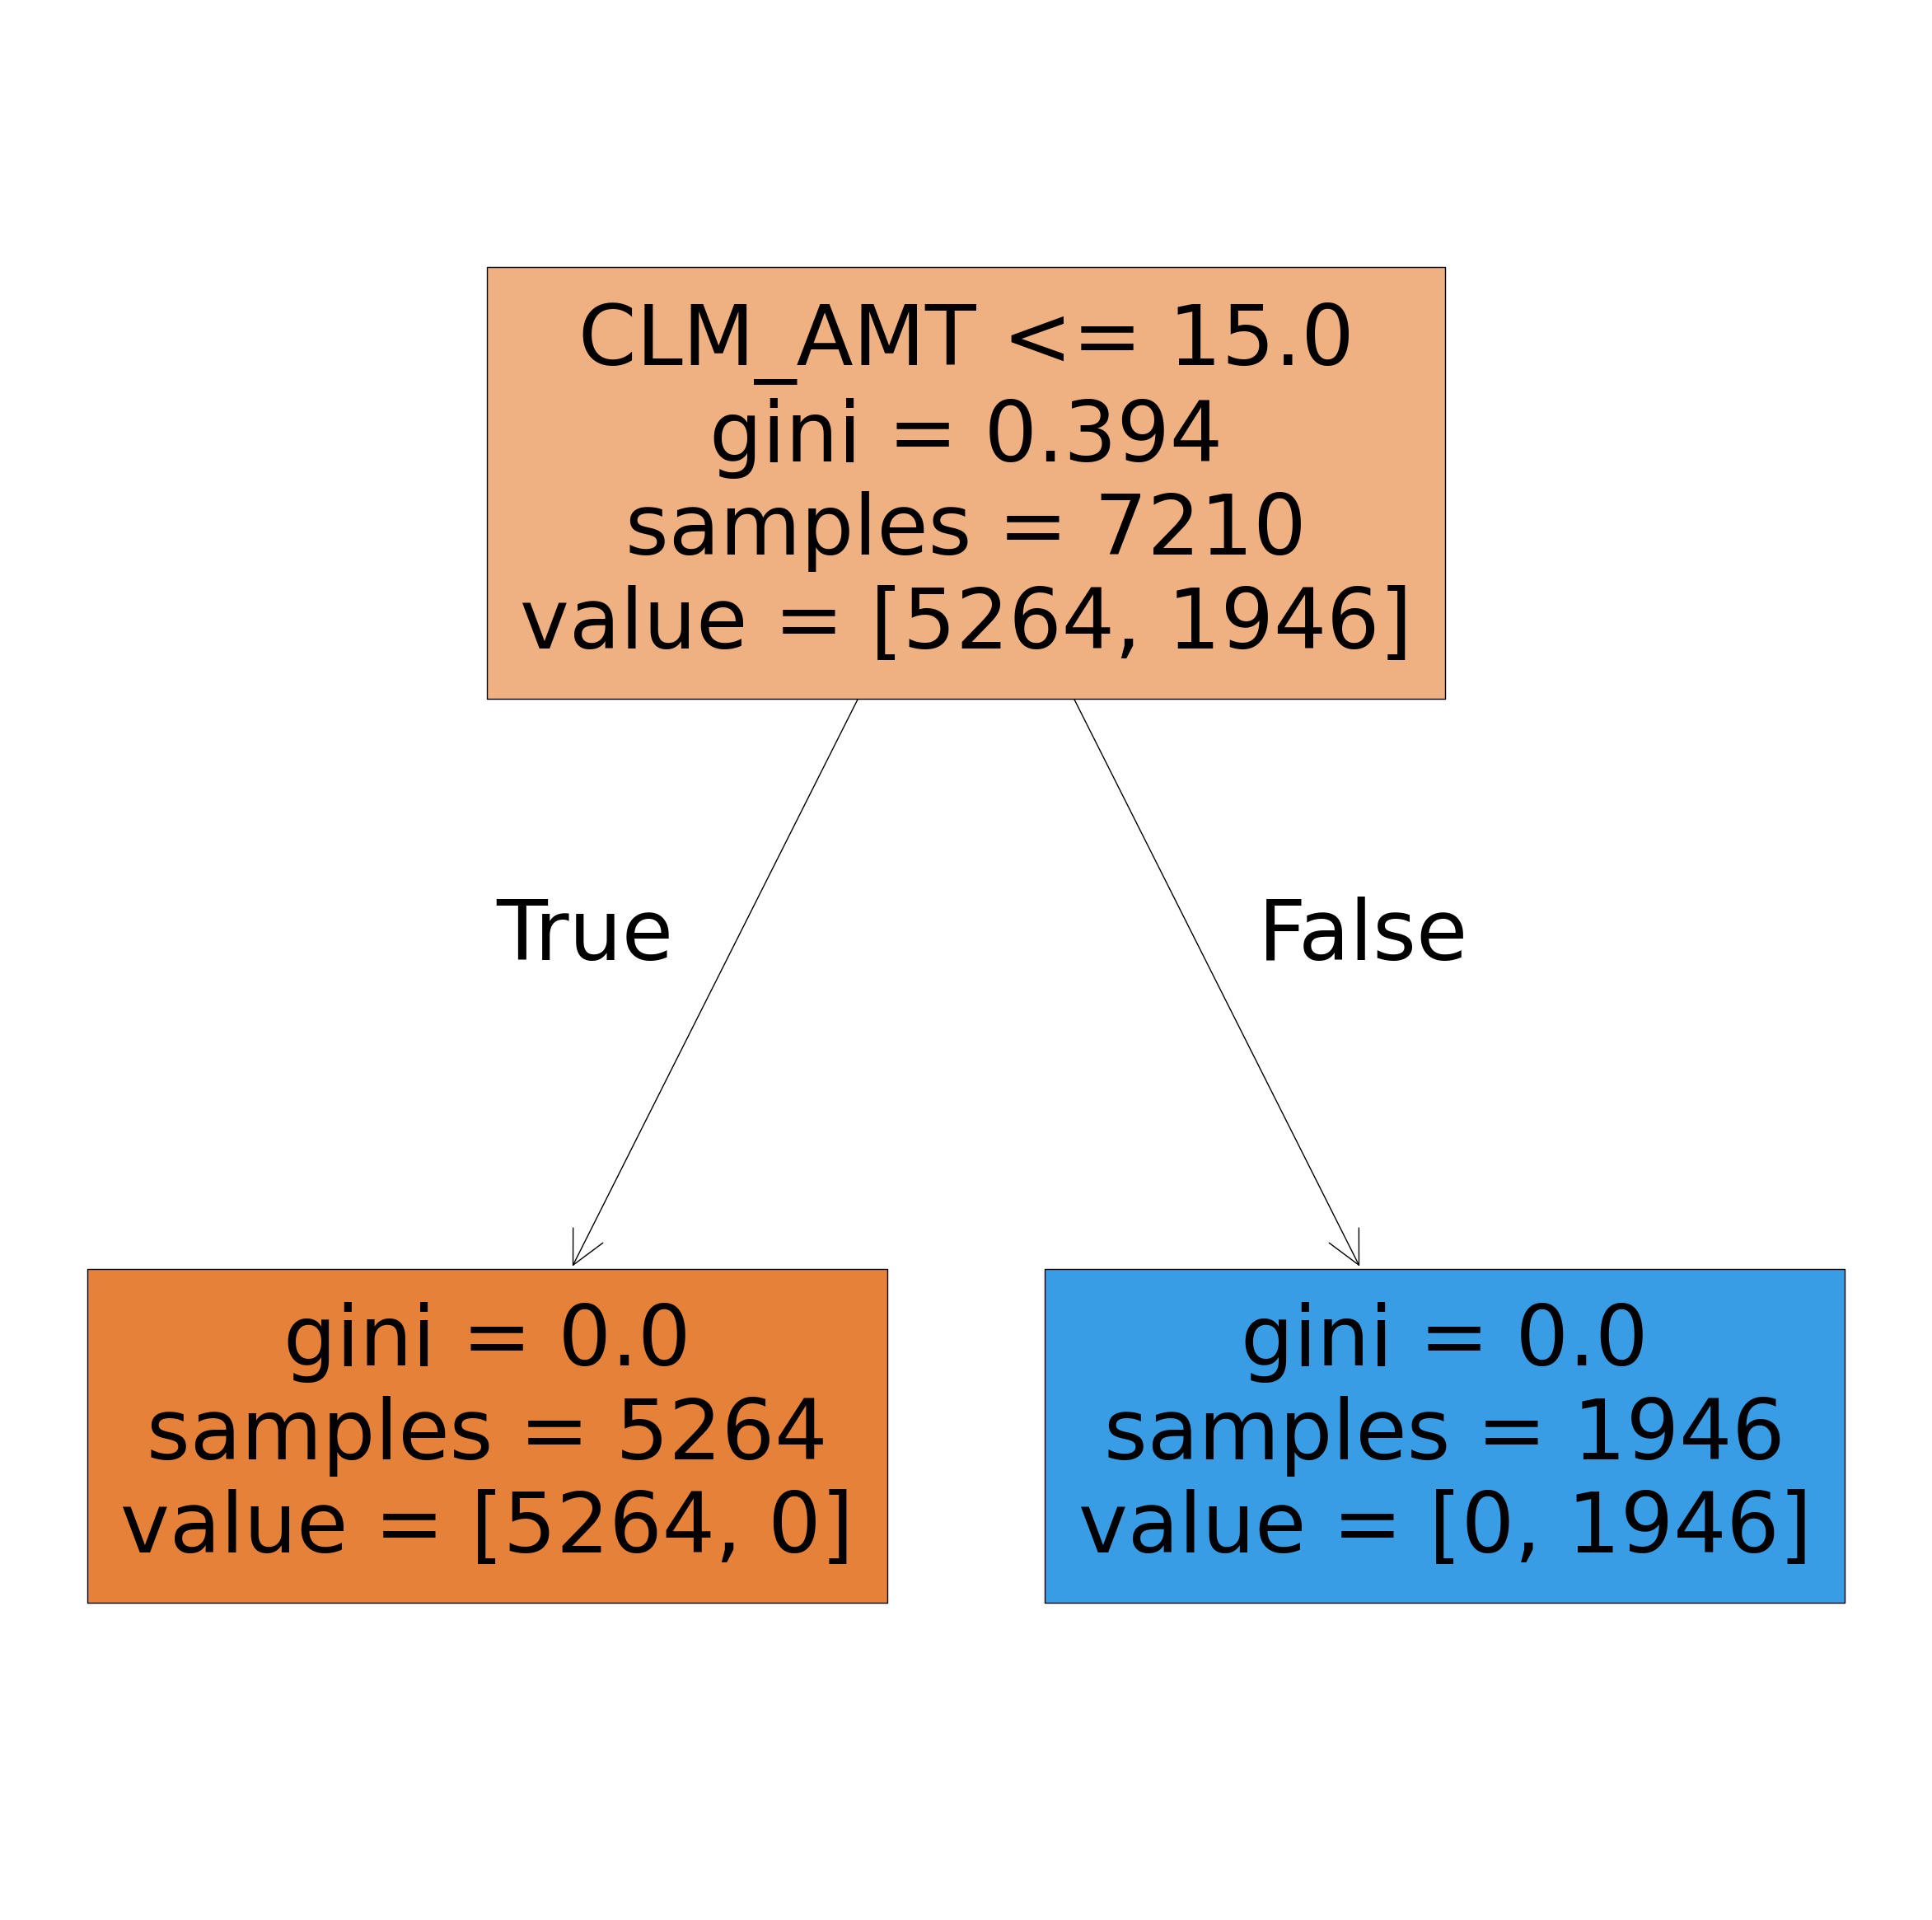

In [ ]:
plt.figure(figsize = (30,30))
plot_tree(dt,filled = True, feature_names=xtrain.columns)
plt.show()

####Random Forest

In [ ]:
rf.fit(xtrain, ytrain)

RandomForestClassifier()

In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

* Trees

In [ ]:
rf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1645639851),
 DecisionTreeClassifier(max_features='sqrt', random_state=1401065851),
 DecisionTreeClassifier(max_features='sqrt', random_state=897489469),
 DecisionTreeClassifier(max_features='sqrt', random_state=1776804614),
 DecisionTreeClassifier(max_features='sqrt', random_state=338336473),
 DecisionTreeClassifier(max_features='sqrt', random_state=492217397),
 DecisionTreeClassifier(max_features='sqrt', random_state=1578697784),
 DecisionTreeClassifier(max_features='sqrt', random_state=387147201),
 DecisionTreeClassifier(max_features='sqrt', random_state=932269721),
 DecisionTreeClassifier(max_features='sqrt', random_state=934849936),
 DecisionTreeClassifier(max_features='sqrt', random_state=1153775271),
 DecisionTreeClassifier(max_features='sqrt', random_state=406466545),
 DecisionTreeClassifier(max_features='sqrt', random_state=558098469),
 DecisionTreeClassifier(max_features='sqrt', random_state=1251225817),
 DecisionTreeC

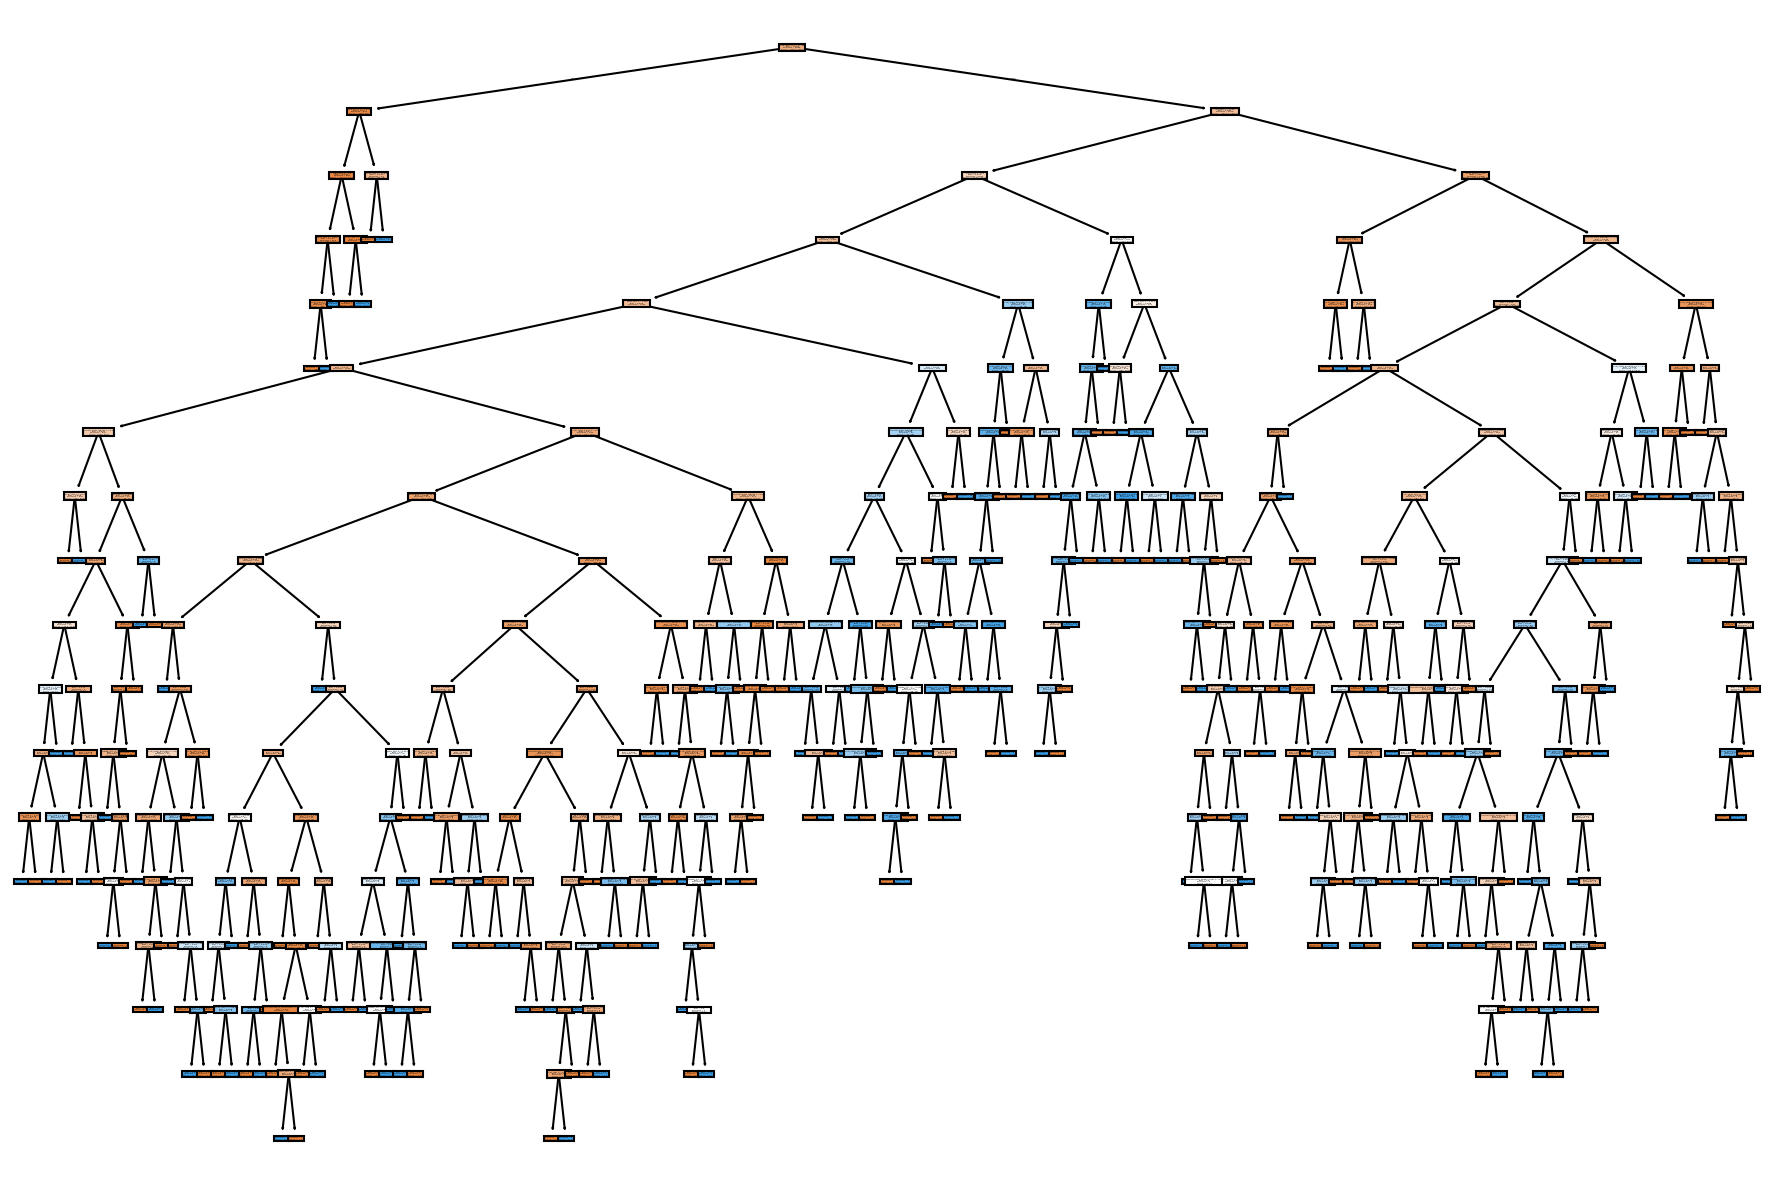

In [ ]:
plt.figure(figsize = (15,10),dpi = 150)
plot_tree(rf.estimators_[1],filled = True, feature_names=xtrain.columns)
plt.show()

####SVM - Support Vector Machine

In [ ]:
svm.fit(xtrain,ytrain)

SVC()

In [ ]:
svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

####Naive Bayes

In [ ]:
nb.fit(xtrain,ytrain)

GaussianNB()

####XGBoost

In [ ]:
# xgboost accepts label data as number

ytrain_ = np.where(ytrain == 'yes',1,0)

In [ ]:
# Train the XGBoost model
xgb.fit(xtrain, ytrain_)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Model Evaluation

* Checking Trained Model Performances on Test Data

* To check Model Performance we can use evaluation methods

    * Loss/Error
    * Model Score
    * Bias-Variance Trade off (Overfit or Underfit)
    * Cross-Val Score

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, roc_auc_score, auc,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_val_score

* Checking the above models perfomance using Test data

In [ ]:
names = ['LogisticRegression', 'KNearestNeighbors', 'Naive Bayes', 'SVM', 'Decision Tree', 'Random Forest', 'XGBoost']

models = [log, knn, nb, svm, dt, rf, xgb]

* Confusion_matrix and Classification_report

Model: LogisticRegression
 ['bold']
Classification Report:
               precision    recall  f1-score   support

          no       1.00      1.00      1.00      2291
         yes       1.00      1.00      1.00       800

    accuracy                           1.00      3091
   macro avg       1.00      1.00      1.00      3091
weighted avg       1.00      1.00      1.00      3091

Confusion_Matrix: ['bold']


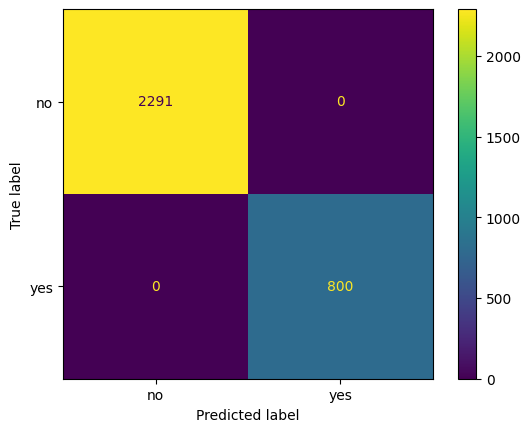

-----------------------------------------------------------------------------------
Model: KNearestNeighbors
 ['bold']
Classification Report:
               precision    recall  f1-score   support

          no       1.00      1.00      1.00      2291
         yes       1.00      0.99      1.00       800

    accuracy                           1.00      3091
   macro avg       1.00      1.00      1.00      3091
weighted avg       1.00      1.00      1.00      3091

Confusion_Matrix: ['bold']


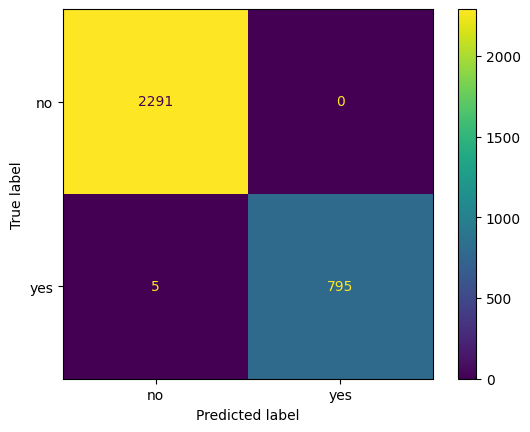

-----------------------------------------------------------------------------------
Model: Naive Bayes
 ['bold']
Classification Report:
               precision    recall  f1-score   support

          no       1.00      1.00      1.00      2291
         yes       1.00      1.00      1.00       800

    accuracy                           1.00      3091
   macro avg       1.00      1.00      1.00      3091
weighted avg       1.00      1.00      1.00      3091

Confusion_Matrix: ['bold']


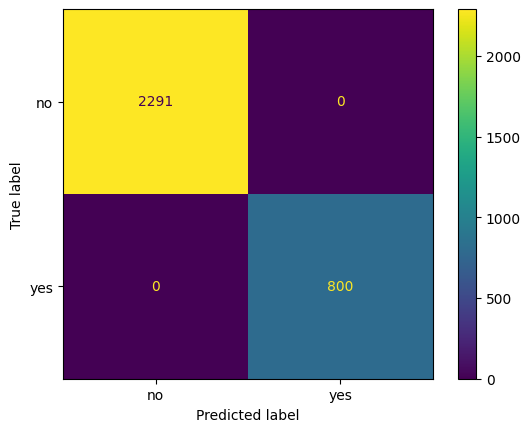

-----------------------------------------------------------------------------------
Model: SVM
 ['bold']
Classification Report:
               precision    recall  f1-score   support

          no       0.99      1.00      0.99      2291
         yes       1.00      0.97      0.98       800

    accuracy                           0.99      3091
   macro avg       0.99      0.98      0.99      3091
weighted avg       0.99      0.99      0.99      3091

Confusion_Matrix: ['bold']


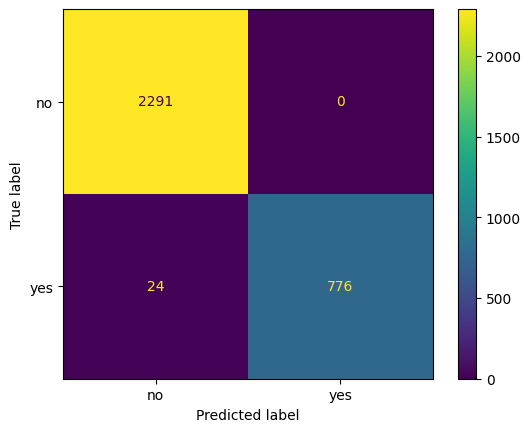

-----------------------------------------------------------------------------------
Model: Decision Tree
 ['bold']
Classification Report:
               precision    recall  f1-score   support

          no       1.00      1.00      1.00      2291
         yes       1.00      1.00      1.00       800

    accuracy                           1.00      3091
   macro avg       1.00      1.00      1.00      3091
weighted avg       1.00      1.00      1.00      3091

Confusion_Matrix: ['bold']


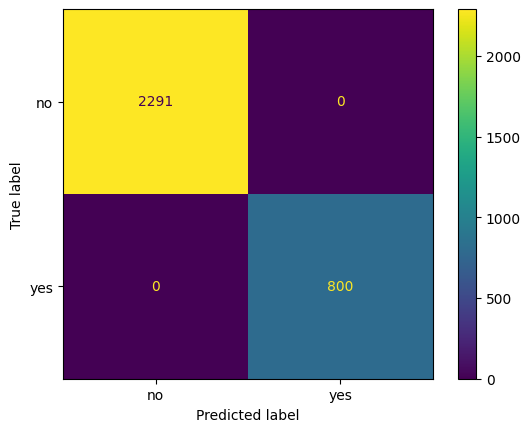

-----------------------------------------------------------------------------------
Model: Random Forest
 ['bold']
Classification Report:
               precision    recall  f1-score   support

          no       1.00      1.00      1.00      2291
         yes       1.00      1.00      1.00       800

    accuracy                           1.00      3091
   macro avg       1.00      1.00      1.00      3091
weighted avg       1.00      1.00      1.00      3091

Confusion_Matrix: ['bold']


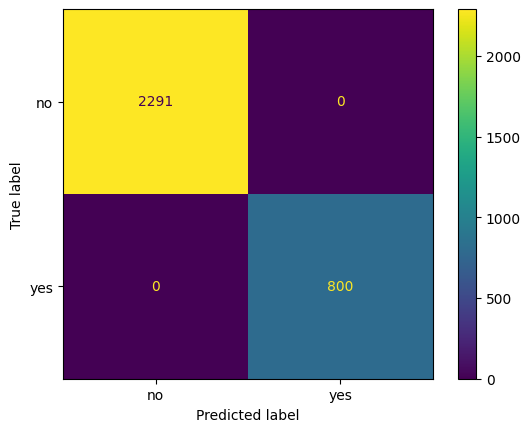

-----------------------------------------------------------------------------------
Model: XGBoost
 ['bold']
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2291
           1       1.00      1.00      1.00       800

    accuracy                           1.00      3091
   macro avg       1.00      1.00      1.00      3091
weighted avg       1.00      1.00      1.00      3091

Confusion_Matrix: ['bold']


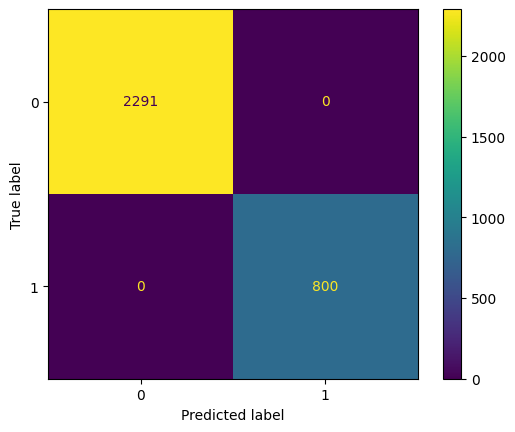

-----------------------------------------------------------------------------------


In [ ]:
for i in range(len(models)):
    print("Model: {}\n".format(names[i]),['bold'])
    if models[i] == xgb:
        ytest_pred = models[i].predict(xtest)
        ytest_ = np.where(ytest == 'yes',1,0)
        print("Classification Report:\n",classification_report(ytest_, ytest_pred))
        print("Confusion_Matrix:",['bold'])
        plt.show(ConfusionMatrixDisplay.from_estimator(models[i], xtest, ytest_))
        print("-----------------------------------------------------------------------------------")
    else:
        ytest_pred = models[i].predict(xtest)
        print("Classification Report:\n",classification_report(ytest, ytest_pred))
        print("Confusion_Matrix:",['bold'])
        plt.show(ConfusionMatrixDisplay.from_estimator(models[i], xtest, ytest))
        print("-----------------------------------------------------------------------------------")

* Check accuracy score for train and test data to decide best model

In [ ]:
trainscore = []
testscore = []
fit = []
crossvalscore = []

In [ ]:
for i in range(len(models)):

    if models[i] == xgb:

        ytrain_ = np.where(ytrain == 'yes',1,0)
        ytest_ = np.where(ytest == 'yes',1,0)

        ytrain_pred = models[i].predict(xtrain)
        ytest_pred = models[i].predict(xtest)

        # Accuracy Score
        f1_score_tr = round(f1_score(ytrain_, ytrain_pred),2)
        f1_score_te = round(f1_score(ytest_, ytest_pred),2)

        trainscore.append(f1_score_tr)
        testscore.append(f1_score_te)

        # Bias-Variance Trade off
        trscore = f1_score_tr
        tescore = f1_score_te

        if trscore<0.50 and tescore<0.50:
            if abs(trscore)==0 and abs(tescore)==0:
                fit.append("Nofit")
            else:
                fit.append("Underfit")

        else:
            if abs(trscore-tescore)<0.10:
                fit.append("Goodfit")
            elif abs(trscore-tescore)>=0.10:
                fit.append("Overfit")
            else:
                fit.append("Fit")

        y_ = np.where(y == 'yes', 1, 0)
        # Cross-val score
        scores = cross_val_score(models[i], X, y_, cv=3)
        crossvalscore.append(round(scores.mean(),2))

    else:

        ytrain_pred = models[i].predict(xtrain)
        ytest_pred = models[i].predict(xtest)

        # Accuracy Score
        acc_score_tr = round(accuracy_score(ytrain, ytrain_pred),2)
        acc_score_te = round(accuracy_score(ytest, ytest_pred),2)

        trainscore.append(acc_score_tr)
        testscore.append(acc_score_te)

        # Bias-Variance Trade Off
        trscore = acc_score_tr
        tescore = acc_score_te


        if trscore<0.50 and tescore<0.50:
            if abs(trscore)==0 and abs(tescore)==0:
                fit.append("Nofit")
            else:
                fit.append("Underfit")

        else:
            if abs(trscore-tescore)<0.10:
                fit.append("Goodfit")
            elif abs(trscore-tescore)>=0.10:
                fit.append("Overfit")
            else:
                fit.append("Fit")

        # Cross-val score
        scores = cross_val_score(models[i], X, y, cv=3)
        crossvalscore.append(round(scores.mean(),2))

In [ ]:
pd.DataFrame({'Model': names,'Trainedmodel': models,'Trainscore': trainscore,'Testscore': testscore,'Crossvalscore': crossvalscore,'Fit': fit})

,Model,Trainedmodel,Trainscore,Testscore,Crossvalscore,Fit
0,LogisticRegression,LogisticRegression(),1.00,1.00,1.00,Goodfit
1,KNearestNeighbors,KNeighborsClassifier(),1.00,1.00,1.00,Goodfit
2,Naive Bayes,GaussianNB(),1.00,1.00,1.00,Goodfit
3,SVM,SVC(),0.99,0.99,0.99,Goodfit
4,Decision Tree,DecisionTreeClassifier(),1.00,1.00,1.00,Goodfit
5,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', r...",1.00,1.00,1.00,Goodfit
6,XGBoost,"XGBClassifier(base_score=None, booster=None, c...",1.00,1.00,1.00,Goodfit


Best Performance Model

* From the above results
     * All models are given better results
     * We take any model for saving and real time prediction

####Saving Model

In [ ]:
import joblib

# Saving onehot encoded model
joblib.dump(one_hot, 'encoder.pkl')

# Saving ordinal encoded model
joblib.dump(od_en,'ordinal.pkl')

# Saving scaling model
joblib.dump(sc, 'scaler.pkl')

# Saving trained model
joblib.dump(log, 'model.pkl')

['model.pkl']

####Real Time Prediction

* Using best model  to get prediction of Claim Insurance, given data by user

In [ ]:
inpdata = pd.read_csv("/content/InsInpData.csv")
inpdata.head(2)

,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,BLUEBOOK,TIF,CAR_TYPE,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,URBANICITY
0,0.0,1939.0,60.0,0.0,11.0,67349.0,0.0,z_no,m,phd,...,14230.0,11.0,minivan,4461.0,2.0,no,3.0,0.0,18.0,highly urban/ urban
1,0.0,1956.0,43.0,0.0,11.0,91449.0,257252.0,z_no,m,z_high school,...,14940.0,1.0,minivan,0.0,0.0,no,0.0,0.0,1.0,highly urban/ urban


In [ ]:
#encoder=joblib.load("encoder.pkl")

# Load the model, scaler, and encoder from pickle files
with open('model.pkl', 'rb') as model_file:
    model = joblib.load(model_file)

with open('scaler.pkl', 'rb') as scaler_file:
    scaler = joblib.load(scaler_file)

with open('encoder.pkl', 'rb') as encoder_file:
    encoder = joblib.load(encoder_file)

with open('ordinal.pkl','rb') as ordinal_file:
    ordinal = joblib.load(ordinal_file)

# Define function for real-time prediction
def real_time_prediction():
    user_input = {}
    user_input['KIDSDRIV'] = int(input("Enter the number of kids of driver: "))
    user_input['BIRTH'] = int(input("Enter year of birth: "))
    user_input['AGE'] = int(input("Enter age: "))
    user_input['HOMEKIDS'] = int(input("Enter number of home kids: "))
    user_input['YOJ'] = int(input("Enter years on job: "))
    user_input['INCOME'] = float(input("Enter income: "))
    user_input['HOME_VAL'] = float(input("Enter home value: "))
    user_input['MSTATUS'] = input("Enter marital status (yes/z_no): ")
    user_input['GENDER'] = input("Enter gender (m/z_f): ")
    user_input['EDUCATION'] = input("Enter education level (Bachelors/Masters/Phd/high school): ")
    user_input['OCCUPATION'] = input("Enter occupation(professional/manager/clerical/doctor/z_blue collar/student/lawyer/home maker): ")
    user_input['CAR_USE'] = input("Enter car use (Commercial/Private): ")
    user_input['BLUEBOOK'] = float(input("Enter Bluebook value of car: "))
    user_input['TIF'] = float(input("Enter time in force (TIF): "))
    user_input['CAR_TYPE'] = input("Enter car type (z_suv/van/pickup/sports car/minivan/panel truck): ")
    user_input['OLDCLAIM'] = float(input("Enter the old claim amount: "))
    user_input['CLM_FREQ'] = int(input("Enter claim frequency: "))
    user_input['REVOKED'] = input("Has the license been revoked (Yes/No): ")
    user_input['MVR_PTS'] = int(input("Enter motor vehicle report points: "))
    user_input['CLM_AMT'] = float(input("Enter the claim amount: "))
    user_input['CAR_AGE'] = int(input("Enter car age: "))
    user_input['URBANICITY'] = input("Enter urbanicity (highly urban/urban/ z_highly rural/rural): ")

    input_df = pd.DataFrame([user_input])

    for col in input_df.columns:
      if input_df[col].dtype=='object':
        input_df[col] = input_df[col].str.lower()

    # Apply one-hot encoding to the nominal columns
    categorical_columns = ['OCCUPATION','CAR_TYPE']
    input_encoded = encoder.transform(input_df[categorical_columns])

    # Convert the encoded input back into a dataframe
    input_encoded_df = pd.DataFrame(input_encoded, columns=encoder.get_feature_names_out(categorical_columns))

    # Drop original categorical columns and concatenate the encoded values
    input_df = input_df.drop(columns=categorical_columns)
    input_df = pd.concat([input_df, input_encoded_df], axis=1)

    # Applying ordinal encoding to the ordinal column
    input_df['EDUCATION'] = od_en.fit_transform(input_df[['EDUCATION']])

    display(input_df.head(2))

    if isinstance(input_df, pd.DataFrame):  # Check if xtrain is a Pandas DataFrame
      input_df.columns = input_df.columns.astype(str)
      input_df.columns = input_df.columns.str.replace(r'[<>[\]]', '', regex=True)

    replacement_mappings = {
    'MSTATUS': {'yes': 1, 'z_no': 0},
    'GENDER': {'m': 1, 'z_f': 0},
    'CAR_USE': {'commercial': 1, 'private': 0},
    'REVOKED': {'yes': 1, 'no': 0},
    'URBANICITY': {'highly urban/ urban': 1, 'z_highly rural/ rural': 0}}

    for column, mapping in replacement_mappings.items():
        if column in input_df.columns:
            input_df[column] = input_df[column].replace(mapping)

    # 2. Feature scaling (use the pre-fitted scaler)
    #numerical_columns = ['ID','KIDSDRIV','BIRTH','AGE','HOMEKIDS','YOJ','INCOME','HOME_VAL','TRAVTIME', 'BLUEBOOK', 'TIF', 'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE']
    input_df.iloc[:,[0,1,2,3,4,5,6,12,13,15,16,18,19,20,21]] = scaler.transform(input_df.iloc[:,[0,1,2,3,4,5,6,12,13,15,16,18,19,20,21]])

    # 3. Make prediction using the model
    prediction = model.predict(input_df)

    return prediction

# Predicting based on the input data
prediction = real_time_prediction()
if prediction == 1:
  print("Yes")
else:
  print("No")